# Exploration Project 01
### Classification - Using scikit-learn Library and Toy Datasets

#### **▶ scikit-learn**

scikit-learn 라이브러리는 파이썬 기반으로 데이터 분석과 머신러닝 분야에서 널리 사용되는 라이브러리이다.

또한, scikit-learn 라이브러리는 여러 데이터셋을 내장하고 있다.

여기서는 파이썬과 scikit-learn 라이브러리를 활용하여 손글씨, 와인, 유방암 분류 프로젝트를 수행하고자 한다.

## 1. 데이터셋

 - 머신러닝에 앞서, 데이터셋의 정보 확인과 해당 데이터들에 대한 이해가 필요하다.
 
 - 데이터에 대한 이해가 곧 데이터를 활용한 결과와 성능에 중대한 요소이기 때문이다.

scikit-learn 라이브러리 에서는 간단하고 작은 데이터셋인 Toy dataset 과

비교적 복잡하고 현실 세계를 반영한 Real world dataset 등의 데이터셋을 제공한다.

본 프로젝트는, 이 데이터 셋 중에서 Toy dataset 에 해당하는 3개의 데이터셋을 활용한다.

scikit-learn 라이브러리 사용전에 패키지 설치가 필요하다.

>\$ pip show scikit-learn

 ▲ 터미널을 사용하여 라이브러리의 설치유무를 파악한다. 설치정보와 버전등이 출력된다면 설치가 된 것이다.

>\$ pip install scikit-learn

 ▲ 패키지를 찾을 수 없다고 화면에 출력 될 경우 이 명령을 사용하여 scikit-learn 패키지를 설치한다.

scikit-learn 라이브러리에서 제공되는 [Toy Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html, "Toy dataset") 에서는, 

데이터셋을 불러오는 내장함수와 데이터셋에 대한 간략한 사용법과 설명 등을 볼 수 있다.


load_digits : [손글씨 이미지 데이터](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

load_wine : [와인 데이터](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

load_breast_cancer : [유방암 데이터](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) 

일단, scikit-learn 라이브러리를 import 하고 데이터셋들을 가져온다.

In [142]:
## scikit-learn Lib
import sklearn.datasets as sklds

digi_ds = sklds.load_digits(as_frame=True)          ## 손글씨 데이터셋
wine_ds = sklds.load_wine(as_frame=True)            ## 와인 데이터셋
canc_ds = sklds.load_breast_cancer(as_frame=True)   ## 유방암 데이터셋

In [141]:
## 데이터셋의 정보를 화면에 출력
def skl_dataset_info(skl_dataset, dsname):
    shap = skl_dataset.data.shape
    print(dsname+".shape :", shap)              ## 데이터의 형상
    print()
    fenm = skl_dataset.feature_names
    print(dsname+".feature_names :\n", fenm)    ## feature. 일종의 문제지. 특징.
    print()
    tgnm = skl_dataset.target_names
    print(dsname+".target_names :\n", tgnm)     ## target. 일종의 답안지. 타겟. (라벨)
    print("─" * 80)    

그리고 각 데이터들의 정보를 파악하기 위한 함수를 정의했다.

In [143]:
## 간략한 설명을 확인
print(digi_ds.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### 1) digit 데이터셋 분석

scikit-learn에서 제공하는 [User guide](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset) 에서는

손글씨 데이터셋의 설명과 형상, feature, target(label) 등에 대한 설명을 출력한다.

이것은 위의 skl_dataset_info(digi_ds, "digit") 함수의 DESCR 출력 부분에서도 찾아 볼 수 있다.

▶ 손글씨 데이터셋의 특성(Data Set Characteristics) 에서는 아래의 내용들을 확인 할 수 있다.

 + 손글씨 데이터셋의 인스턴스 수 : 1797

 + 손글씨 데이터셋의 속성 수 : 64

 + 손글씨 데이터셋의 속성에 관한 정보 : 8×8 픽셀의 형태, 0~16 범위의 수를 갖는 픽셀들로 이루어져 있다

 + 누락된 속성 : 없음. (=결측치가 없다.)

In [144]:
## 데이터셋의 특성들에 대해서 검토한다

skl_dataset_info(digi_ds, "digit")
# skl_dataset_info(wine_ds, "wine")
# skl_dataset_info(canc_ds, "breast cancer wisconsin")

digit.shape : (1797, 64)

digit.feature_names :
 ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']

digit.target_names :
 [0 1 2 3 4 5 6 7 8 9]
─────────────────────────────────────────────────────────────────────────

손글씨 데이터셋 피쳐의 이름을 보면 이것이 픽셀데이터를 의미하고,

64개의 이름들을 살펴 보았을 때, pixel_ 이라는 문자 뒤에 붙는 두 숫자와 함께

이것이 2차원 데이터의 인덱스를 의미함을 이름에서도 확인이 가능하다.

또한, 앞서 손글씨 데이터셋의 DESCR 에 나온대로,

이 데이터들은 [0, 0] 에서 시작하여 [7, 7] 까지로 이루어진 8 × 8 행렬을

64개의 1차원으로 나열한 것이며, 각 요소는 0 ~ 16 사이의 정수를 확인 할 수 있다.

(Attribute Information: 8x8 image of integer pixels in the range 0..16.)

In [74]:
# 데이터의 일부를 확인
digi_ds.data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


이 데이터를 통해 손글씨 이미지의 내용을 확인하고 싶을 경우에는

우선, 1차원으로 이루어진 64개의 피쳐들을 8×8 의 2차원에 구성한다.

그리고 matplotlib 의 imshow() 함수를 통해 데이터를 시각화 하여 확인할 수 있다.

0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


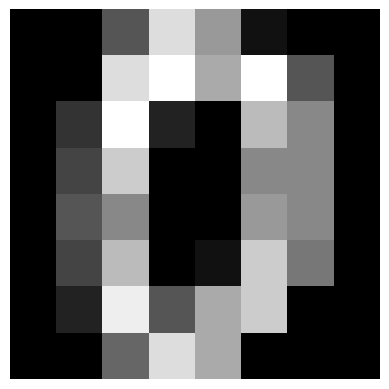

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# pandas datafrme 타입을 사용하지 않을 경우에는 아래는 오류가 발생
# 아래 코드는 <class 'numpy.ndarray'> 타입일 경우에 사용하자
# plt.imshow(digi_ds.data.loc[0].reshape(8, 8), cmap='gray')
# plt.axis('off')
# plt.show()

# pandas dataframe type 에서 reshape 하려고 numpy 라이브러리를 사용했다.
# print(digi_ds.data.loc[0].to_numpy().reshape(8,8))  ## numpy array 로 변경
# plt.imshow(digi_ds.data.loc[0].to_numpy().reshape(8,8), cmap='gray')
# plt.axis('off')
# plt.show()


# scikit-learn 라이브러리에서 데이터셋을 로드할 때에 파라메터를 통해 데이터 형식을 지정할 수 있다.
# 여기서는 해당 타입에 따라 타입변환을 해서 출력을 하는 함수 digi_imshow 를 호출했다.
# 우선 numpy.ndarray 와 pandas.dataframe 타입을 받도록 구성하였다.

## type 문제 때문에 함수를 만들었다.
def digi_imshow(digi_ds, idx):
    #idx = int(idx)
    print(idx)
    if type(idx) is not int:
        print("idx : integer")
        return; 
    #print(type(digi_ds.data))
    if type(digi_ds.data) is np.ndarray:
        plt.imshow(digi_ds.data.loc[idx].reshape(8, 8), cmap='gray')
        plt.axis('off')
        plt.show()
    elif type(digi_ds.data) is pd.DataFrame:
        print(digi_ds.data.loc[idx].to_numpy().reshape(8,8))
        plt.imshow(digi_ds.data.loc[idx].to_numpy().reshape(8,8), cmap='gray')
        plt.axis('off')
        plt.show()

digi_imshow(digi_ds, 0)

데이터를 확인해보면, 어렴풋이 8×8 픽셀로 그려진 숫자를 확인 할 수 있다.

위 코드에서는 별도의 함수를 선언하여 사용하였다.

이번에는 digit 데이터셋에 포함된 target 의 데이터를 살펴볼텐데

데이터셋의 정보를 확인하는 과정에서 이용한 target 부분에서 라벨에 대한 내용을 확인 할 수 있다.

라벨은 지도학습 방법에서 일종의 정답지 역할을 하는 데이터이며, 지도학습을 위한 데이터들이 들어가 있다.

In [138]:
# target 데이터를 확인해 보늡 방법은 간단하다.
digi_ds.target.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

target 데이터를 따로 보니 구조가 한눈에 보이지 않는다.

그래서 데이터프레임에 약간의 처리를 해 보겠다.

In [161]:
## 새 데이터프레임을 만든다
digi_df = pd.DataFrame(data=digi_ds.data, columns=digi_ds.feature_names)

## 컬럼 label 을 추가하여 target 데이터를 보여주도록 설정. (라벨링)
digi_df["label"] = digi_ds.target

## 끝에서 5번째 데이터까지만 출력
digi_df["label"].tail()


1792    9
1793    0
1794    8
1795    9
1796    8
Name: label, dtype: int32

이번엔 tail 함수를 통해 끝에서 5번째 까지의 데이터를 가져왔다.

피쳐부분은 생략하였으니, 왼편에 인덱스 숫자, 그리고 오른편에 라벨 값을 확인 할 수 있다.

그러면 아까 만든 함수 digi_imshow 를 이용해서 이 인덱스의 데이터를 시각화 한 다음

라벨 값과 맞는지 확인을 해 보겠다.

1793
[[ 0.  0.  6. 16. 13. 11.  1.  0.]
 [ 0.  0. 16. 15. 12. 16.  1.  0.]
 [ 0.  3. 16.  7.  0. 13.  6.  0.]
 [ 0.  4. 16.  0.  0. 10.  8.  0.]
 [ 0.  8. 16.  0.  0. 14.  6.  0.]
 [ 0.  5. 16.  7.  9. 16.  5.  0.]
 [ 0.  1. 15. 16. 16. 16.  1.  0.]
 [ 0.  0.  6. 16. 14.  6.  0.  0.]]


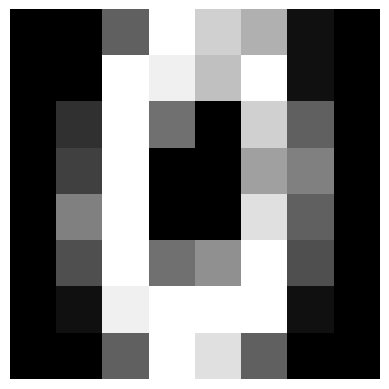

1794
[[ 0.  0.  1. 11. 15.  1.  0.  0.]
 [ 0.  0. 13. 16.  8.  2.  1.  0.]
 [ 0.  0. 16. 15. 10. 16.  5.  0.]
 [ 0.  0.  8. 16. 16.  7.  0.  0.]
 [ 0.  0.  9. 16. 16.  4.  0.  0.]
 [ 0.  0. 16. 14. 16. 15.  0.  0.]
 [ 0.  0. 15. 15. 15. 16.  0.  0.]
 [ 0.  0.  2.  9. 13.  6.  0.  0.]]


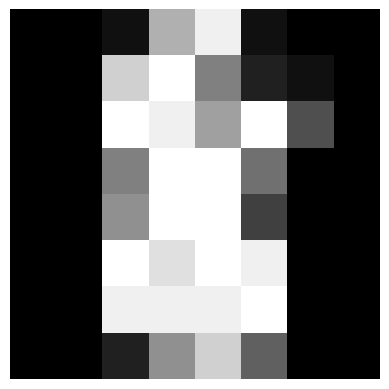

1795
[[ 0.  0.  2. 10.  7.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 15.  1.  0.]
 [ 0.  4. 16.  7.  3. 16.  7.  0.]
 [ 0.  5. 16. 10.  7. 16.  4.  0.]
 [ 0.  0.  5. 14. 14. 16.  4.  0.]
 [ 0.  0.  0.  0.  0. 16.  2.  0.]
 [ 0.  0.  4.  7.  7. 16.  2.  0.]
 [ 0.  0.  5. 12. 16. 12.  0.  0.]]


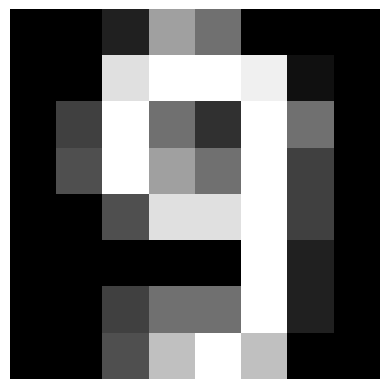

1796
[[ 0.  0. 10. 14.  8.  1.  0.  0.]
 [ 0.  2. 16. 14.  6.  1.  0.  0.]
 [ 0.  0. 15. 15.  8. 15.  0.  0.]
 [ 0.  0.  5. 16. 16. 10.  0.  0.]
 [ 0.  0. 12. 15. 15. 12.  0.  0.]
 [ 0.  4. 16.  6.  4. 16.  6.  0.]
 [ 0.  8. 16. 10.  8. 16.  8.  0.]
 [ 0.  1.  8. 12. 14. 12.  1.  0.]]


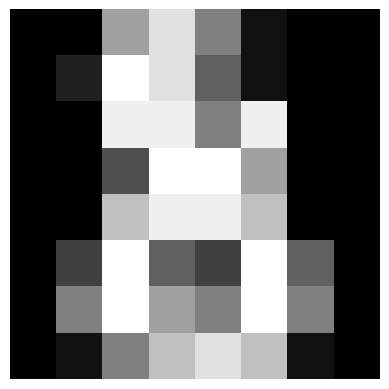

In [162]:
## digit 데이터셋의 tail() 값. 맨 끝의 데이터에서 5개만 가져온다.
# index   label
# 1792    9
# 1793    0
# 1794    8
# 1795    9
# 1796    8

digi_imshow(digi_ds, 1793)      # 0
digi_imshow(digi_ds, 1794)      # 8
digi_imshow(digi_ds, 1795)      # 9
digi_imshow(digi_ds, 1796)      # 8

이렇게 라벨과 데이터를 매칭시켜보고 확인 해 보면

라벨의 값이, 손글씨로 표현한 숫자임을 확인 할 수 있었다.

digit 데이터는 손글씨 이미지를 변환한 것인데, 이를 표현하려면 결측값이 있으면 곤란하다.

DESCR 에서도 확인 했지만 (Missing Attribute Values: None) 혹시 모르니

특징데이터에 결측값이 있는지 한번 검토 해 보는 방법은

isna 함수와 sum 함수를 이용하여 결측값을 파악하는것이 가능하다.

In [166]:
## digit dataframe 에서 각 컬럼별로 결측값의 수량을 파악
digi_df.isna().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
label        0
Length: 65, dtype: int64

역시나 결측값은 없는 것을 확인 할 수 있다.

>현재 손글씨 데이터의 경우
>
>8×8 픽셀의 64개의 특징 데이터가 존재 하지만, 이는 손글씨 숫자 이미지 1개와 다를 바 없다.
>
>논리적으로는 데이터와 타겟이 1:1 매칭 관계라고 볼 수 있어서, 
>
>중복데이터가 있다거나 연관이 없다거나, 무의미한 특징 값이 딱히 없기 때문에
>
>더이상 EDA를 수행 할 필요가 없다고 생각된다.

지금까지 digit dataset 의 데이터 특징에 대해서 검토를 해 보았다.

+ digit 데이터는, 16단계의 회색 픽셀 데이터를 8×8 (64개의 픽셀) 형태로 가지고 있다.

+ 라벨 값은 머신러닝을 통해 학습시킬 일종의 정답이라고 할 수 있는 데이터를 가지고 있다.

### 2) digit 데이터셋 분리

앞서 살펴본 내용은, scikit-learn 라이브러리에서 제공하는 Toy dataset 을 이용하여

머신러닝에 학습할 데이터를 가져와서 준비하고 분석하는 과정을 거쳤다.

다음에는 5가지 모델을 통한 머신러닝과 예측을 하는 과정을 수행하는 과정으로 진행을 하게 되는데.

그에 앞서서 데이터셋의 분리를 진행해야 한다.

이 프로젝트에서의 머신러닝 학습 방법은, 지도학습(Supervised Learning)을 사용한다.

지도학습이란, 정답 결과가 있는 데이터들을 통하여 머신러닝하는 방법을 의미한다.

지도학습은 크게 __분류(Classification)__ 와 __회귀(Regression)__ 로 구분할 수 있는데,

여기서는 데이터들을 분류하는 문제들을 다루고 있다.

앞서 불러온 3종류의 데이터셋 모두 데이터들의 특징들을 학습하고,

그 학습을 토대로, 데이터가 어떤 분류에 해당하는지 예측하고 분류할 것이다.

지도학습의 경우, 데이터셋의 분리가 필요한데, 여기서 말하는 데이터셋의 분리란

지도학습을 위한 데이터와, 학습의 결과로 예측 결과를 평가하기 위한 데이터를

먼저 분리를 하여 학습을 위한 데이터로 학습을 진행해야 할 필요가 있다.

그 이유를 비유하자면, 라벨링 된 전체 데이터를 통하여 학습을 수행하고, 

해당 데이터로 다시 예측을 하게 될 경우에는

학습 결과의 공정성과 타당성에 대한 문제가 있기 때문이다.

우리가 어떤 과목의 전체 시험문제와 답안을 미리 학습하였는데,

실제 시험에서 동일한 문제와 답안이 있다면？

그 학습의 결과를 제대로 판단하기 어려워진다.

그러한 이유로 지도학습의 경우 라벨링 이루어진 데이터의 어느 부분은

학습에 이용하지 않은 상태로 남겨두고, 그 외의 데이터들로 학습을 수행한다.

여기서 학습에 쓰이지 않은 데이터들은 모델 학습의 예측 결과를 바탕으로

예측이 어느정도 정확한지 측정하는 등의 용도로 사용하게 된다.

scikit-learn 라이브러리에서는 데이터셋 분리를 위해 편리하게 사용할 수 있는

train_test_split 이라는 함수를 제공하고 있다.

In [232]:
# sklearn.model_selection 패키지의 train_test_split을 활용하여, 
# 다음과 같이 training dataset과 test dataset을 간단히 분리할 수 있다.

from sklearn.model_selection import train_test_split

## X_train : 학습용 데이터
## X_test : 테스트용 데이터
x_train, x_test, y_train, y_test = train_test_split(digi_ds.data,       ## 첫번째 매개변수 data : feature. 특징 데이터. 일종의 문제지
                                                    digi_ds.target,     ## 두번째 매개변수 target : 모델이 맞추어야 하는 정답 값.
                                                    test_size=0.2,      ## test_size : 테스트 데이터셋의 크기를 조절. 0.2 = 20％를 테스트 데이터로 사용
                                                    random_state=5)     ## random_State : train 데이터와 test 데이터를 분리시 적용할 랜덤성 결정

print('x_train 개수: ', len(x_train),', x_test 개수: ', len(x_test))    ## 데이터셋 분리의 결과 : X_train 개수, X_test 개수의 출력

x_train 개수:  1437 , x_test 개수:  360


train_test_split 의 함수의 사용법은 위의 코드에서 확인 할 수 있다.

 - 첫번째 매개변수는 특징 데이터를 지정한다

 - 두번째 매개변수에 타겟을 지정한다. 정답을 의미한다.

 - 세번째 매개변수는 테스트 데이터의 비율을 조정한다. 0.2 = 20％를 테스트 데이터로 사용하고, 남은 80％ 데이터는 학습에 사용한다
 
 - 네번째 매개변수는 랜덤에 관한 설정이다.
 
이 함수의 반환값을 언패킹해서 4개의 변수에 데이터를 담아, 학습에 사용하게 된다.

여기서 네번째 매개변수의 __random_state__ 에는 특징적인 역할이 있다.

이 파라메터를 지정하는 첫번째 이유는, 랜덤하게 데이터를 추출하기 위함이다.

데이터셋 내부의 데이터가 특정 순서대로 정렬이 되어 있는 경우에는

데이터를 랜덤성있게 섞는 과정을 거치지 않을 경우, 다양한 학습이 이루어지기 어려워진다.

인덱스 순서상 후반에 정렬 결과로 자리잡고 있는 데이터들이 학습 과정에서 누락되게 되기 때문이다.

두번째 이유는, random_state 를 이용하면 랜덤이긴 하지만 재현 가능한 랜덤으로,

매번 랜덤을 통한 결과를 동일하게 하는데에 목적이 있다.

random_state 뒤에 따라붙는 seed 값이 같다면, 여러번 데이터의 분리를 수행하며

랜덤을 거치더라도, 그 결과 데이터셋의 레코드는 늘 동일하게 나오도록 되어있다.

이는 이 테스트의 결과를 어디에서나 재현가능하게 하기 위함이다.

코드를 통해 테스트 해 보면 다음과 같다

In [173]:
## 여기서는 random_state 를 지정하지 않았다.
X_train, X_test, y_train, y_test = train_test_split(digi_ds.data,
                                                    digi_ds.target,
                                                    test_size=0.2)
X_train.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
163,0.0,6.0,16.0,16.0,16.0,15.0,10.0,0.0,0.0,9.0,...,0.0,0.0,0.0,9.0,16.0,11.0,0.0,0.0,0.0,0.0
292,0.0,0.0,9.0,16.0,15.0,14.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,8.0,15.0,10.0,1.0,0.0,0.0
1691,0.0,0.0,0.0,2.0,14.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13.0,1.0,0.0,0.0
1325,0.0,0.0,7.0,10.0,16.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,16.0,14.0,0.0,0.0,0.0
1490,0.0,2.0,15.0,13.0,1.0,0.0,0.0,0.0,0.0,13.0,...,12.0,0.0,0.0,3.0,16.0,14.0,8.0,8.0,7.0,0.0


In [175]:
## 여기서는 random_state 를 지정하지 않았다.
X_train, X_test, y_train, y_test = train_test_split(digi_ds.data,
                                                    digi_ds.target,
                                                    test_size=0.2)
X_train.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
892,0.0,0.0,10.0,15.0,13.0,1.0,0.0,0.0,0.0,4.0,...,3.0,0.0,0.0,0.0,10.0,16.0,12.0,3.0,0.0,0.0
65,0.0,0.0,0.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,0.0,6.0,12.0,14.0,9.0,0.0
425,0.0,1.0,7.0,12.0,13.0,3.0,0.0,0.0,0.0,7.0,...,8.0,0.0,0.0,0.0,5.0,12.0,16.0,11.0,1.0,0.0
739,0.0,0.0,5.0,12.0,12.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,10.0,12.0,0.0,0.0,0.0
1373,0.0,1.0,8.0,16.0,15.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0


head 함수를 통해 5줄만 확인해 봤음에도, 매번 그 값이 다른것을 확인할 수 있다.

반면, 이하에서는 random_state=5 를 지정하고, 

실행을 반복하여 값을 확인해보면 동일한 결과가 나올 것으로 예상된다.

In [176]:
## 여기서는 random_state 를 지정했다.
X_train, X_test, y_train, y_test = train_test_split(digi_ds.data,
                                                    digi_ds.target,
                                                    test_size=0.2, 
                                                    random_state=5)
X_train.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
203,0.0,0.0,10.0,15.0,7.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,1.0,12.0,15.0,12.0,3.0,0.0,0.0
1697,0.0,0.0,7.0,12.0,13.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,14.0,14.0,4.0,0.0,0.0
1745,0.0,0.0,7.0,14.0,8.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,7.0,0.0,0.0,0.0
23,0.0,1.0,8.0,12.0,15.0,14.0,4.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,14.0,15.0,11.0,2.0,0.0,0.0
798,0.0,3.0,16.0,15.0,6.0,0.0,0.0,0.0,0.0,5.0,...,5.0,0.0,0.0,4.0,16.0,16.0,16.0,14.0,3.0,0.0


In [177]:
## 여기서는 random_state 를 지정하지 않았다.
X_train, X_test, y_train, y_test = train_test_split(digi_ds.data,
                                                    digi_ds.target,
                                                    test_size=0.2, 
                                                    random_state=5)
X_train.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
203,0.0,0.0,10.0,15.0,7.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,1.0,12.0,15.0,12.0,3.0,0.0,0.0
1697,0.0,0.0,7.0,12.0,13.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,14.0,14.0,4.0,0.0,0.0
1745,0.0,0.0,7.0,14.0,8.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,7.0,0.0,0.0,0.0
23,0.0,1.0,8.0,12.0,15.0,14.0,4.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,14.0,15.0,11.0,2.0,0.0,0.0
798,0.0,3.0,16.0,15.0,6.0,0.0,0.0,0.0,0.0,5.0,...,5.0,0.0,0.0,4.0,16.0,16.0,16.0,14.0,3.0,0.0


random_state 를 동일하게 적용한 경우를 확인해보면, 그 결과가 동일함을 알 수 있다.

지금까지 데이터셋의 분리의 목적과 방법에 대해서 알아보았다.

그리고 scikit-learn 에서 제공하는 train_test_split 함수와

random_state 매개변수에 대해서도 다루었다.

이 학습 데이터와 테스트 데이터를 분리하는 과정의 필요성과 중요도를 알 수 있었다.

지도학습의 진행은 크게 3단계 정도로 요약 해 볼 수 있는데,

 - 첫번째 단계는 데이터셋을 가져오고 데이터들을 분석하는 과정 (scikit-learn import, load 함수)
 
 - 두번째 단계는 데이터셋을 분리하는 과정 (학습데이터 테스트데이터 분리, train_test_split 함수)

 - 세번째 단계는 학습모델을 적용하여 학습 과 예측을 수행

이상의 과정들을 거쳐서 학습과 예측을 마치고 나서 얻은 결과를 평가하는것이 이번 프로젝트의 목표이다.


### 3) digit 데이터셋의 모델 학습과 분류 예측

scikit-learn 라이브러리는 다양한 머신러닝 모델을 제공하고 있다.

여기서는 scikit-learn 라이브러리에서 제공하고 있는 5가지 모델들을 통해

데이터셋들을 학습시키고 분류 예측을 수행한다.

scikit-learn 에서는 여러 모델 과 모델에 대한 사용자 안내를 제공하고 있다. 

+ Decision Tree : https://scikit-learn.org/stable/modules/tree.html

+ RandomForest : https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

+ Support vector machines : https://scikit-learn.org/stable/modules/svm.html

+ Stochastic Gradient Descent - SGD : https://scikit-learn.org/stable/modules/linear_model.html#stochastic-gradient-descent-sgd

+ Logistic regression : https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

위의 5가지 모델은, 본 프로젝트에서 적용할 모델의 목록이다.



앞서 진행했던 내용을 토대로 데이터셋과 라벨을 입력받아서

8:2 비율로 학습 : 테스트 데이터를 분리하는 과정까지를 알아보았는데,

이 과정에 필요한 모듈 import, 데이터 로드, 데이터 분리 과정과

각 5가지 모델들의 학습 및 예측을 수행하여 결과를 종합하는 함수를 아래에서 구현하고,

분류 리포트를 통하여 대략적인 학습지표 평가를 후반부에 진행할 것이다.

우선 모델 학습 과 예측과정을 수행해서 분류 리포트를 표시하는 코드는 아래와 같다.

In [2]:

import sklearn.datasets as sklds                        ## scikit-Learn datasets
from sklearn.tree import DecisionTreeClassifier         ## 1. Decision Tree
from sklearn.ensemble import RandomForestClassifier     ## 2. Random Forest
from sklearn import svm                                 ## 3. Support vector machine
from sklearn.linear_model import SGDClassifier          ## 4. Stochastic Gradient Descent
from sklearn.linear_model import LogisticRegression     ## 5. Logistic regression
from sklearn.model_selection import train_test_split    ## train_test_split
from sklearn.metrics import classification_report       ## classification_report


## fit → predict → report 출력
def fpr_out(model, datapack):

    ## train_test_split 의 결과를 여기에서 언패킹
    ## 랜덤 추출한 학습, 테스트 데이터 서브셋의 내용이 패킹되어 있다
    x_train, x_test, y_train, y_test = datapack     ## 언패킹 (데이터셋 분류)
    
    ## 학습용 데이터셋(x, y)을 받아서, 지정한 학습 모델을 구축
    model.fit(x_train, y_train)                     ## 모델학습 (학습 데이터 이용)
    
    ## 분류 또는 회귀 값의 예측을 수행.
    ## 분류 모델의 경우는 샘플에 대한 예측 클래스를 반환
    y_pred = model.predict(x_test)                  ## 각 샘플에 대한 예측 클래스 반환
    
    ## 테스트용 데이터와 그 예측 결과 데이터를 토대로 리포트 작성
    #return classification_report(y_test, y_pred)    ## 분류 리포트를 반환
    return classification_report(y_test, y_pred, zero_division=1)    ## 220911 추가 - SGD모델에서 zero_division 경고 출력 방지


def learn(data, label, model):
    
    ## 학습 데이터 / 테스트 데이터의 분리
    ## 여기서는 입력받은 데이터셋의 학습-테스트 데이터 분할을 포함한 목록을 언패킹 상태로 사용한다.
    ## frp_out 함수에서 언패킹해서 사용하기 위함.
    ##x_train, x_test, y_train, y_test = \
    datapack = \
        train_test_split(
            data,
            label,
            test_size=0.2, 
            random_state=5)

    return fpr_out(model, datapack)


digi_ds = sklds.load_digits(as_frame=True)          ## 손글씨 데이터셋
# wine_ds = sklds.load_wine(as_frame=True)            ## 와인 데이터셋
# canc_ds = sklds.load_breast_cancer(as_frame=True)   ## 유방암 데이터셋

cls_report = learn(digi_ds.data, digi_ds.target, DecisionTreeClassifier())
print(cls_report)


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        35
           1       0.84      0.89      0.86        35
           2       0.83      0.83      0.83        36
           3       1.00      0.81      0.90        37
           4       0.86      0.75      0.80        32
           5       0.88      0.83      0.85        46
           6       0.96      0.87      0.91        30
           7       0.89      0.95      0.92        42
           8       0.73      0.87      0.80        38
           9       0.76      1.00      0.87        29

    accuracy                           0.87       360
   macro avg       0.88      0.87      0.87       360
weighted avg       0.88      0.87      0.87       360



지금까지의 과정은 learn 함수 안에 다시 정리해서 구현하였다.

learn 함수 안의 코드 실행은 다음과 같은 흐름을 따른다.

learn 함수는 세개의 파라메터를 입력받는데,

첫번째 인자는 특징 데이터를,

두번째 인자는 라벨 데이터를,

세번째 인자는 학습 모델을 지정한다.

내부적으로 학습 데이터와 테스트 데이터를 분리하는 코드가 실행되고,

fpr_out 이라는 함수에 값을 넘기게 된다.

frp_out 함수 안에서 일어나는 일들은 다음과 같다.

frp_out 함수는 두개의 파라메터를 사용하는데,

첫번째 인자는 scikit-learn 내장함수의 train_test_split 반환 값을 그대로 입력 받고

두번째 인자는 학습 모델을 지정한다.

이어서 scikit-learn에서 제공하는 fit 함수와 predict 함수를 사용하게 되는데,

fit 함수에서 첫번째 인자로 받은 데이터셋과 

두번째 인자에서 지정한 학습 모델을 토대로 학습 모델을 구축한다.

predict 함수에서는 학습모델을 통해 예측을 수행하게 된다.

그리고 그 리포트를 반환 값으로 가진다.

frp_out 함수의 결과 값은 다시 learn 함수의 반환값으로 보내지게 되고

learn 함수의 실행결과 최종적으로 반환되는 값은,

매개변수로 지정한 데이터셋과, 지정한 학습 모델을 통한 학습을 수행한 결과 리포트가 반환된다.

이제부터는 코드 두줄을 사용하여

각 모델들을 학습시키고 예측하고 리포트를 받아와서 화면에 출력을 하도록 하겠다.

In [358]:
## 1. Decision Tree Model
cls_report = learn(digi_ds.data, digi_ds.target, DecisionTreeClassifier())
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.76      0.91      0.83        35
           2       0.85      0.81      0.83        36
           3       0.91      0.81      0.86        37
           4       0.83      0.75      0.79        32
           5       0.90      0.83      0.86        46
           6       0.93      0.87      0.90        30
           7       0.89      0.95      0.92        42
           8       0.84      0.82      0.83        38
           9       0.76      1.00      0.87        29

    accuracy                           0.86       360
   macro avg       0.87      0.87      0.86       360
weighted avg       0.87      0.86      0.86       360



In [344]:
## 2. Random Forest
cls_report = learn(digi_ds.data, digi_ds.target, RandomForestClassifier())
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35
           2       0.97      1.00      0.99        36
           3       1.00      0.95      0.97        37
           4       1.00      0.97      0.98        32
           5       0.96      0.96      0.96        46
           6       1.00      0.97      0.98        30
           7       0.98      0.98      0.98        42
           8       0.92      0.95      0.94        38
           9       0.90      0.97      0.93        29

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [345]:
## 3. Support vector machine
cls_report = learn(digi_ds.data, digi_ds.target, svm.SVC())
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      0.95      0.97        37
           4       1.00      1.00      1.00        32
           5       0.96      0.98      0.97        46
           6       1.00      1.00      1.00        30
           7       1.00      0.98      0.99        42
           8       0.95      0.95      0.95        38
           9       0.90      0.93      0.92        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [362]:
## 4. Stochastic Gradient Descent
cls_report = learn(digi_ds.data, digi_ds.target, SGDClassifier())
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      0.91      0.93        35
           2       0.95      1.00      0.97        36
           3       0.97      0.95      0.96        37
           4       1.00      0.97      0.98        32
           5       0.98      0.93      0.96        46
           6       1.00      0.97      0.98        30
           7       0.98      0.98      0.98        42
           8       0.92      0.92      0.92        38
           9       0.82      0.93      0.87        29

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [357]:
## 5. Logistic regression
cls_report = learn(digi_ds.data, digi_ds.target, LogisticRegression(max_iter=5000))
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.89      0.97      0.93        35
           2       0.95      1.00      0.97        36
           3       0.97      0.95      0.96        37
           4       0.97      0.91      0.94        32
           5       0.98      0.93      0.96        46
           6       1.00      0.97      0.98        30
           7       0.98      0.98      0.98        42
           8       0.97      0.92      0.95        38
           9       0.88      0.97      0.92        29

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



이와 같이 5가지 학습모델을 하나씩 적용하고, 학습과 분류 예측을 마치고

분류 리포트를 확인 해 보았다.

각 모델학습에 대한 결과인 리포트 자료들을 참고하여 수치를 기록해두겠다.

나머지 두개의 데이터셋의 학습과 리포트를 전부 취합하여

각 모델별 분석에 사용할 데이터에 추가한 뒤에

차후 다시 모델들만 분석을 진행하겠다.

digit 데이터셋의 경우, 5가지 모델에서 85％ 이상의 분류예측 정확도를 나타냈다.

|model＼dataset                 |digit|wine|cancer|
|-------------------------------|-----|----|------|
|Decision Tree                  |0.86 |NA  |NA    |
|Random Forest                  |0.97 |NA  |NA    |
|Support vector machine         |0.98 |NA  |NA    |
|Stochastic Gradient Descent    |0.96 |NA  |NA    |
|Logistic regression            |0.96 |NA  |NA    |

### 4) wine 데이터셋 분석

앞서 digi 데이터셋의 경우 특징요소의 갯수가 (8×8 픽셀을 의미) 64개를 가지고 있었지만,

64개의 피쳐가 실제로는 한장의 이미지 데이터를 의미한다는 것을 확인 할 수 있었다.

DESCR 내용에 따르면 결측값이 없다 하였고, 실제로 데이터셋을 확인해 봐도

결측값은 찾을 수 없었다. 사실상 데이터셋 자체는 무결함이 보장된 데이터였다고 할 수 있다.

wine 데이터셋은 어떨까？

이번에는 wine 데이터셋의 분석을 수행 해 보고자 한다.

In [228]:
wine_ds = sklds.load_wine(as_frame=True)
print(wine_ds.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

이 와인 데이터는 세명의 다른 경작자가 이탈리아의 같은 지역에서 생산 한

와인에 대해 화학적 분석한 결과를 나타낸 것이며,

__3가지 유형의 와인에서 발견되는 서로 다른 성분들에 대한 13가지 측정__ 을 거쳤다고 한다.

결측치나 지나친 중복치 등으로 데이터가 부실한 특징요소등이 있다거나,

3가지 유형으로 분류하는 과정에서 의미가 없는 피쳐 요소를 특정할 만한 근거가 없다고 보인다.

하여, 이 데이터셋도 샘플수가 많은 편은 아니지만 무결성은 충분히 확보했다고 판단된다.

In [229]:
## 데이터셋의 정보도 한번 확인해보자.
skl_dataset_info(wine_ds, "wine.data")

wine.data.shape : (178, 13)

wine.data.feature_names :
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

wine.data.target_names :
 ['class_0' 'class_1' 'class_2']
────────────────────────────────────────────────────────────────────────────────


In [254]:
## 순번 낮은 데이터부터 5개를 출력해 보았다.
wine_ds.data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [231]:
## 물론 오피셜 정보를 믿지만, 피쳐에 결측치가 있는지 다시 한번 확인해 봤다.
wine_ds.data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

### 5) wine 데이터셋의 모델 학습과 분류 예측

데이터셋의 준비와 분석을 마친 데이터는, 학습 데이터와 테스트 데이터의

분리 과정을 거친 후에 모델 학습과 예측을 진행하게 된다.

하지만 이전에 『2) digit 데이터셋 분리』, 『3) digit 데이터셋의 모델 학습과 분류 예측』 부분에서

이러한 과정을 도와주는 함수를 만들었다.

scikit-learn에서 제공하는 분류 모델 학습방법은

digit 데이터셋 때와 마찬가지로 큰 틀에서 다를 것이 없다.

데이터셋과 모델만 바꾸어 적용하면, 모델 학습과 분류 예측 결과를 확인할 수 있다.

이것은 매우 간결하고 편리한 방법이다.

굳이 사용자 정의 함수를 만들지 않아도 크게 복잡하지 않은 구조이지만,

기껏 데이터셋과 모델만 다르게 지정해서 사용할 수 있게 만들었으니 여기서도 쓰겠다.

In [4]:
# digi_ds = sklds.load_digits(as_frame=True)          ## 손글씨 데이터셋
wine_ds = sklds.load_wine(as_frame=True)            ## 와인 데이터셋
# canc_ds = sklds.load_breast_cancer(as_frame=True)   ## 유방암 데이터셋

## 1. Decision Tree
cls_report = learn(wine_ds.data, wine_ds.target, DecisionTreeClassifier())
print(cls_report)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.67      0.91      0.77        11
           2       0.86      0.75      0.80         8

    accuracy                           0.81        36
   macro avg       0.82      0.81      0.80        36
weighted avg       0.83      0.81      0.81        36



In [365]:
## 2. Random Forest
cls_report = learn(wine_ds.data, wine_ds.target, RandomForestClassifier())
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [367]:
## 3. Support vector machine
cls_report = learn(wine_ds.data, wine_ds.target, svm.SVC())
print(cls_report)

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.69      0.82      0.75        11
           2       0.44      0.50      0.47         8

    accuracy                           0.69        36
   macro avg       0.66      0.67      0.66        36
weighted avg       0.72      0.69      0.70        36



In [379]:
## 4. Stochastic Gradient Descent
cls_report = learn(wine_ds.data, wine_ds.target, SGDClassifier())
print(cls_report)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       1.00      0.09      0.17        11
           2       0.36      0.62      0.45         8

    accuracy                           0.61        36
   macro avg       0.71      0.55      0.49        36
weighted avg       0.74      0.61      0.55        36



In [380]:
## 5. Logistic regression
cls_report = learn(wine_ds.data, wine_ds.target, LogisticRegression(max_iter=5000))
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.85      1.00      0.92        11
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



wine 데이터셋의 경우 정확도에서 차이가 제법 발생했다.

digit 데이터셋때와 같이 리포트를 토대로 값을 채워보자.

|model＼dataset                 |digit|wine|cancer|
|-------------------------------|-----|----|------|
|Decision Tree                  |0.86 |0.83|NA    |
|Random Forest                  |0.97 |1.00|NA    |
|Support vector machine         |0.98 |0.69|NA    |
|Stochastic Gradient Descent    |0.96 |0.58|NA    |
|Logistic regression            |0.96 |0.94|NA    |

놀랍게도 1.00 정확도를 달성한 모델이 있었다.

### 6) breast_cancer 데이터셋 분석

이번에는 Breast cancer wisconsin 데이터셋 차례이다.

다음 코드를 통해 설명을 먼저 확인한다.

In [260]:
canc_ds = sklds.load_breast_cancer(as_frame=True)
print(canc_ds.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

우선 569 개의 인스턴스와 30개의 피쳐로 구성되어 있음을 알 수 있었다.

다만 애트리뷰트 정보에 따르면, 10가지 항목에 대해 설명하고 있고,

그 아래에, 30개 피쳐의 결과는 각 이미지를 통해 계측된 값의

mean, standard error, worst 라고 한다. 

피쳐 이름들을 한번 확인해 보자.

In [264]:
canc_ds.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

mean, error, worst 3개의 구분 단어를 확인 할 수 있다.



이번에는 타겟을 살펴보겠다.

In [265]:
canc_ds.target_names

array(['malignant', 'benign'], dtype='<U9')

2개 항목이 존재하는데, malignant : 악성, benign : 양성 을 의미한다.

악성과 양성의 차이가 무엇인고 하니, 악성이 우리가 말하는 암 이라는 것이고.

양성은 어느정도 성장하다가 중단이 되고 전이가 없다고 한다.

제공된 데이터셋에서 연관성이 없다고 볼 수 있는 데이터는 보이지 않는다.

피쳐, 타겟정보 모두 결측치가 혹시 있는지 확인 결과 결측 없었다.

### 7) breast_cancer 데이터셋의 모델 학습과 분류 예측

앞서 2개의 데이터셋의 모델 학습과 분류 예측 부분에서도 다루었듯이,

이미 만들어놓은 일련의 처리 구조를 따르는 함수를 통하여

이 데이터셋도 마찬가지로 모델 학습과 분류 예측하고 결과를 정리하겠다.

In [270]:
# digi_ds = sklds.load_digits(as_frame=True)          ## 손글씨 데이터셋
# wine_ds = sklds.load_wine(as_frame=True)            ## 와인 데이터셋
canc_ds = sklds.load_breast_cancer(as_frame=True)   ## 유방암 데이터셋

## 1. Decision Tree
cls_report = learn(canc_ds.data, canc_ds.target, DecisionTreeClassifier())
print(cls_report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        48
           1       0.96      0.97      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [271]:
## 2. Random Forest
cls_report = learn(canc_ds.data, canc_ds.target, RandomForestClassifier())
print(cls_report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.96      0.98      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [272]:
## 3. Support vector machine
cls_report = learn(canc_ds.data, canc_ds.target, svm.SVC())
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        48
           1       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [273]:
## 4. Stochastic Gradient Descent
cls_report = learn(canc_ds.data, canc_ds.target, SGDClassifier())
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        48
           1       0.86      1.00      0.92        66

    accuracy                           0.90       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.90      0.90       114



In [274]:
## 5. Logistic regression
cls_report = learn(canc_ds.data, canc_ds.target, LogisticRegression(max_iter=5000))
print(cls_report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.96      0.98      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



다른 데이터셋들과 마찬가지로 리포트를 토대로 값을 채워보자.

|model＼dataset                 |digit|wine|cancer|
|-------------------------------|-----|----|------|
|Decision Tree                  |0.86 |0.83|0.96  |
|Random Forest                  |0.97 |1.00|0.96  |
|Support vector machine         |0.98 |0.69|0.94  |
|Stochastic Gradient Descent    |0.96 |0.58|0.90  |
|Logistic regression            |0.96 |0.94|0.96  |


## 2. 모델

지금까지 scikit-learn 에서 제공하는 3개의 데이터셋과

5개의 모델, 여러 기능을 구현한 함수들을 통해 학습과 분류 예측을 수행하고

그 결과 리포트를 확인하고 정리하는 과정을 가졌다.

|model＼dataset                 |digit|wine|cancer|
|-------------------------------|-----|----|------|
|Decision Tree                  |0.86 |0.83|0.96  |
|Random Forest                  |0.97 |1.00|0.96  |
|Support vector machine         |0.98 |0.69|0.94  |
|Stochastic Gradient Descent    |0.96 |0.58|0.90  |
|Logistic regression            |0.96 |0.94|0.96  |

이 결과를 토대로 각 데이터셋의 특징에 따라서 각 모델들에서

유리한 모델이 있는가 하면, 상대적으로 불리한 모델도 있는것으로 보인다.

여기서는 각 모델들에 대해서 어떤 특징이나 장단점이 있길래

결과들에서 차이가 있었는지 한번 생각해 보는 기회를 가지도록 하겠다.

### 1) Decision Tree

Decision Tree 모델의 개요를 살펴보면,

데이터셋을 반복적으로 분할하는 과정을 통해, 서브셋 내의 데이터가

충분히 동질적일 때 까지 분할 작업을 반복하는 과정을 거치며

나무의 가지들이 분리되는 구조를 형성해가고 가지의 끝(잎, Leaf)은 분류 예측의 판별이 된다.

이 모델의 장점과 단점에 대해서도 scikit-learn 모듈 공식 문서에 표기가 되어있는데,

scikit-Leaen 의 1.10 Decision Tree ([https://scikit-learn.org/stable/modules/tree.html](https://scikit-learn.org/stable/modules/tree.html))

의 일부를 인용하자면,

> #### 장점

 - 이해하고 해석하기 쉽다. Tree 시각화를 할 수 있다.

 - 약간의 데이터 준비만 필요하다. <br>다른 기술은 데이터 정규화 더미변수 만들거나 빈값 제거 등의 작업이 필요.

 - 수치 및 범위 데이터를 모두 처리할 수 있다.

> #### 단점
 
 - 지나치게 복잡한 트리를 만드는 등의 과적합 발생할 수 있음.<br>Leaf 노드에 필요한 샘플 수 설정 또는 트리의 최대 깊이 설정과 같은 메커니즘이 요구.
 
 - 데이터 준비 과정이 간결하다 하나, 결측치는 지원하지 않음.

 - scikit-learn 의 Decision Tree 구현에는 범위형 변수가 지원되지 않음.

등의 내용을 확인할 수 있다.


여기서 한가지, scikit-learn 에서 제공하는 Decision Tree 의 경우

장점의 하나로, 시각화가 가능하다고 하였다.

scikit-learn 에서는 Grapiviz 형식을 통한 방법에 대해서 간략하게 소개하고 있다.

conda 패키지 관리자를 통해 python-graphviz 인스톨 하면 사용할 수 있다.

그렇지만, 이러한 외부 패키지 설치 없이 scikit-learn 에서도 자체적으로

export_text 라는 함수를 제공하고 있는데, graphviz 와 다르게

그래픽으로 표현 해 주지는 않고 텍스트로 표현을 해 준다.

텍스트 형식의 출력이라 하더라도 Tree 의 구조를 파악하는데에는 상당히 도움이 된다.

export_text 의 간단한 사용을 알아보자.

In [287]:
from sklearn.tree import export_text
dtree = DecisionTreeClassifier(random_state=0, max_depth=4)     ## max_depth 증가에 따라 트리 계층이 복잡해짐
dtree = dtree.fit(wine_ds.data, wine_ds.target)
r = export_text(dtree, feature_names=wine_ds["feature_names"])
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- color_intensity <= 5.82
|   |   |   |   |--- class: 1
|   |   |   |--- color_intensity >  5.82
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- class: 1
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- hue <= 0.80
|   |   |   |--- class: 2
|   |   |--- hue >  0.80
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.50
|   |   |   |--- class: 0
|   |   |--- magnesium >  135.50
|   |   |   |--- class: 1



Tree 시각화를 통해, 부등호와 우변의 수치등을 확인하면,

분류예측이 어떤 처리과정을 따라 흐르는지 살펴볼 수 있다.

이것을 통해 Decision Tree 예측 과정에 대한 이해가 조금 편해졌다.

|model＼dataset                 |digit|wine|cancer|
|-------------------------------|-----|----|------|
|__Decision Tree__                  |__0.86__ |__0.83__|__0.96__  |
|Random Forest                  |0.97 |1.00|0.96  |
|Support vector machine         |0.98 |0.69|0.94  |
|Stochastic Gradient Descent    |0.96 |0.58|0.90  |
|Logistic regression            |0.96 |0.94|0.96  |

Decision Tree 의 경우 3개의 데이터셋에 대한 분류 결과 리포트에서

일반적으로 83~96％ 정도의 정확도를 보여줬는데,

다른 데이터셋 대비, 비교적 breast_cancer 데이터셋에서 높은 정확도를 보였다.

<hr>

이러한 결과에 대해 추측해 보자면,

좀전의 시각화(export_text) 결과를 토대로 판단했을때

digit, wine 데이터셋은 각각 피쳐들에 대해서 일부 피쳐만을 사용했을 때에

breast_cancer 데이터셋 대비, 결과 예측도가 떨어지는 것으로 판단된다.


wine 데이터셋의 시각화 결과를 보면

처음의 상위 노드에서 proline 피쳐 먼저 확인을 하고

그 아래의 노드들로 분할을 통해 반복적으로 분류를 해 나가는 과정을 알 수 있다.


digit, wine 셋은 여러 피쳐들 중에 이렇게 상위에 위치하게 될 노드가 되는 피쳐가,

다른 피쳐들과 어느정도 연관성은 있을 테지만, 그렇다고 해서

breast_cancer의 피쳐들이 서로 가지고 있는 연관성 보다는 아무래도 낮을 것이다.


그도 그럴 수 밖에 없는것이, 자료의 계측과 그에 따른 클래스 분류 방법에서부터

차이가 있기 때문으로 생각된다.


우선 피쳐 데이터셋의 경우에서도 각각 조금씩 차이가 보인다.

digit = 0~9 까지 10개의 target

wine = class_0, class_1, class_2

breast_cancer = 악성, 양성

상대적으로 breast_cancer 데이터는,

학습데이터에서부터 10개의 피쳐들이 각각 3개씩의 연관된 값을 가지고 있다.

또한, 악성이냐 아니냐(양성)의 판단만이 필요하기에

피쳐들간의 데이터를 고려하면 상대적으로 뚜렷한 분류가 가능한 데이터들을

계측하였고, 그 값을 특징데이터에 담아놓아, 밀접한 연관성이 있다고 보인다.

그러한 이유로 그 외 4개 모델에서도

90％ 이상의 정확도를 나타내는 것이 아닐까 생각된다.


### 2) Random Forest

Random Forest 의 개요를 보면,

쉽게 설명하자면 Decision Tree 를 여러개 모아놓은 개념이라고 할 수 있다.

이러한 단일 모델을 여러개 구성하여, 단일 모델을 사용할 때의

단점을 극복하려는 개념으로 볼 수 있다. 

이러한 기법은 앙상블(Ensemble) 기법이라고도 한다.

이것은 scikit-leanr 에서 Ensemble 패키지에서 제공하고 있다.

Random Forest 를 설명하기에 적절한 예시를 [텐서플로우 허브](https://blog.tensorflow.org/2021/05/introducing-tensorflow-decision-forests.html)에서 다루고 있는데, 아래와 같다.

<img src="data:image/;base64,iVBORw0KGgoAAAANSUhEUgAAAjgAAADqCAYAAACvHD/7AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAHwwSURBVHhe7Z0HYFzF1bbf7VW992JL7t24YDDNgDFgeu+QAmkQWj5I8oV8+dMIpJGQUEw11YANxsam2Ma4gHtvcpPVrd5W2+8/Z3bluiutbWklrc6TDLs792p9994p75w5c0YFQBGJYRiGYRgmYlD7XxmGYRiGYSIGFjgMwzAMw0QcLHAYhmEYhok4WOAwDMMwDBNxsMBhGIZhGCbiYIHDMAzDMEzEwQKHYRiGYZiIgwUOwzAMwzARBwschmEYhmEiDhY4DMMwDMNEHCxwGIZhGIaJOFjgMAzDMAwTcbDAYRiGYRgm4mCBwzAMwzBMxMECh2EYhmGYiIMFDsMwDMMwEQcLHIZhGIZhIg4WOAzDMAzDRBwscBiG6XdoNRrotBr/J4ZhIhGVSIrvLcMwvY333nsPQwYP9n8KzG+eegq/+d//hVqtxtKlS/HwI4/A4/H4jwIjRozAK7NmwWAw4I0338SzzzxzXKVPSEjAp59+CrPJhEcefQRffvmV/8hRfiv+jWuuuUa+X7R4EX7xi/+BopzcdFgsFixbtgwGvV5+vvOuO7Fp02acf/75+Oc//iHz2qG/ttvtqKyowIKFCzF79mzYbDZ57E9/+hNmXHYZFixYgCeefFLmBeLNN97AqFGj/J9OplV83y233IKDBw8iKysLjz32GC644AIMHTpU3q8DBw5g+fLl8t/btWuX/68YhokUqJ3hxIlTL0wbNmwQOkJRHA6HUlNTEzBNmTJFefyxxxSv16s0NzcrAwcOOPL3ohNX3nnnHfkdojNXNOLzsd9P6cknn5THie+++07+zYnnzJo1y3+Gouzbt0+JiYk56RxKM2de6T/Lx9lnn+3Pnyk/u91upba29si119fXK0KMyWNvvTVbUalU8vy3335b5gnRc9z3n5hWrlghzxPC6Lh70p6EsBH3Y6AixI34t+rkuU1NTfI37N27V/77RGNjozJo0KCA/wYnTpz6bAqYyYkTp16Q2gXOp59+qqSnpwdMBoNBMZvNyubNm+W59KrX6+XfX3/ddVJUEPfcc/dJ309/S0KAaBcaY8eOPem8YwUOfR+JqhPPofTiiy/6z/JxosAhwUFCov3a8/LylJ/99KeKy+WS//6NN94gzz9VgfPss88ed0/aU1pamqLVapXf/va38ryioiL572s0GinkcnNzlW+++UYee/PNNwP+G5w4ceqbiX1wGKYP0NbWhvLy8oDJ4XDIqZ1f/epXcmpq5MiRuO222+R00a//938hOnOsXrUKs2e/5f+2o1x66aVyioq+56UXX5B5QozI10Bs3bpVfh9NWalUNMN9FJ1WK7/P6XSitrbWn3s8Ho8bFRUVR66dpoheePFFlJWVySmjhx9+xH/mqdHU1HTkO49N9G8JQYZx48bK8xYtWoTdu3fL++T1euXU1ezZb8pzJ06cKM9hGCYyYIHDMBEC+dHMmvWyfP+LX/wCt99+m/S/aWhowA033ACXyyWPHcuMGTPk68svv4y58z6WHf/l/rxAvP32W9Jv5qJp0zB06BB/ro/b77gd2dnZ2Lt3L4qLi/25nUMCbc+ePfJ9YmKifO1qSkpK5euFF1wAvU4r37cza9YrGDRoEMaO9YkghmEiAxY4DNMHSEtLwxVXXHFSMplM/jMgnX6ffeZZac2gDvuf/3xOWllmzZqFispK/1lHoWOXX365FBifffYZtmzZgqbGRowbPx7jxo3zn3U8Op0eL730knx/6aXT5Suh1+vx858/LK/h8ccek59DJTY2VlqdiL1FRfL1VCksLAx4f8iqRLzyyitoaWnB0GHDsKdoL373u99Jiw1Zo8jCQ8coMQwTWQScu+LEiVPPp3YfnGDkZGef9DdPPvGE/6gi/WuMRsNJ51C666675DkVFRVKdHSUzFuwYIHMW7Ro0XHOxu0+OH/+85+l/w05Pa9atfLI8VGjRimtra3K9u3blaioKGX37t3y/BN9cA4dKlZGjx4tHX8p0Xd9PG+ePEbfec4558jzT9UHJxhRVvORc8ePG6vs2rXriE8SUVlZqdx8882KxWI57ns5ceLU9xNbcBimD0BTOLSU+cTU0NjoP8OHTqfD9OlHLStmsxmjR4/xfzoKnUdLpon333sPTU3N8v0vn3xCvk6aNAk5OTny/bHEx8dj8+bNqKurw/jxZ6GwsEDmk+8N/Vvz58+XliHypwlEVlY2Nm7ciKKiIplWrFiBmVddJY/97Gc/k59PB/q7QPfH4Tg6Lbdu/QYIwYXp4lrpN5OvUEpKCt566y0s+eoruYycYZjIIqDy4cSJU8+ndgvOnDlzAh4/MV1xxRXSEkKrkmjFELFs2TK5WurY80aOHCktLsTPf/5z5cYbbzySyOpDK5rIstF+frsF571335Wff/WrX8rPb82erWg0amXXzp3y88SJE5WYmGhl/7598vOJFhxaxv7hBx8o777zjkyvv/668sgjDyvp6WlH/i1Kp2rB+c1vfhPweEcpMTFR+fWvfy2tOAStAAt0HidOnPpsCpjJiROnXpBOReCo1SoZ64b4QIiIwYMHK3a7XcbHIeFz7LmPPvqoPI+g48emdpYsWXLk/HaBM2/uR/IzLbNua2tT6urqlJ/+9Kfy2P79+2UcG4qR034dJwqcffv2SgHU/r3BUlcKnKSkJOXee++ViZaOn3j8Cf+UHsXSOfEYJ06c+m7iKSqGiQBoSujZZ/+K3Nxcufz5L3/5i1zNNG/ePDll9Oabb2LAgHx5rkac+73vfU++nzt3Lh5//PHj0r/+9Zw8dt5558lVWIGg1Vb03dHR0XjyySelc/FDDz0UMLrxiYRwSpdC94Yco8nZevr0S/25RyGnbIKm7RiGiSyOUzycOHHqPandgrN48WJl6NChARM5yGZnZyvV1dXy3GefeebI3+fn5yktLS0y//nnn5d5M2bMkJ+JSRMnHjm3PVGQwPa/+de//iWtMidacCiRRaSdQ4cOKbGxsTK/MwuOEEVHviNYarfgzJ8/P+BvLiwslE7Q7RYcus5A55EVi6bn3nvvPWmdOlRcrEyaNElOT8XFxSkFBQXSMZo41mLFiROniEgBMzlx4tQLUmerqIiLp007ch753cTGHr+NwoMPPig7d5qCOWv8eOWjDz+U5+7Zs0dONR17bnv6wx/+IM/Ztm2bFFCBBA6tvCJfHZk/b96RVVddKXCCUVVVJa+rs1VUJNRGjBihpKamKuvXr5N5dM0UUZm2aqApPKKhoUEZPWpUwGvhxIlT30y0ne5TIjEM0wuh+DcUbXfTpk1BE0XrtVqt8v2rr76KNWvW+v/aB/19VFSUjOCbnpGBuvp6OX313//+F9u3b/efdTxC2MigexSwb8mSJfL768XfrV69Gt99t0ae43D4IhYfPnwYz/3znzhUUiLzaUqIVifRyi+KHEwrrmiFFW32uW7denz11Vcy9kxHJCUloaam5qTf2p7Wr1+PxYsXIyk5GYcOHQp4Tnui8yhS8YsvvojS0lLYbK3ifkTL6TSKzDxnzhzceuut2L9/v/9fZxgmEqBY66R0GIZh+g0U4I8gfyUSOgzDRB4scBiGYRiGiTh4FRXDMAzDMBEHCxyGYRiGYSIOFjgMwzAMw0QcLHAYhmEYhok4WOAwDMMwDBNxsMBhGIZhGCbiYIHDMAzDMEzEwQKHYRiGYZiIgwUOwzAMwzARBwschmEYhmEiDhY4DMMwDMNEHCxwGIZhGIaJOFjgMAzDMAwTcbDAYRiGYRgm4mCBwzAMwzBMxMECh2EYhmGYiIMFDsMwDMMwEYdKJMX3lgkX1157DQYPHuz/dJT9+w/gvffeg6J0zSNRq9XIyc5G4aBCLF78uT+XYTonIyMDDzzwgP/TUdxuN5566in/pzODyufVV1+Fc845FyqVCkuWLMH8+fP9Rxmm+5kyZQouu+wy/6ejVFZW4oUXXoDL5fLnMH0RtuD0AGPHjsOMGZfL9Pvf/0E08tfI9xMnTJANfVdQUFCABQsWoGjvXjzyyKP+XIYJDaPRgEGFBRg+bBgeffRRXHXVTPm5sHCg/wwxOjqhrAYqux2V53HjxuHtt9+Ro6yoqCh8+OGHyM/L8x1kmDAQHxcnyzWlBx98ENMuuki+z83JkQKcONNyfiyhnsd0HWQu4NRDyel0Krm5ufJ9bGys8sMf/lC54IILlOeee05JTk5WBgwYoPzxD39QxKhZfE6S52k0GuWy6dOVf/3rX8o999yjGI3G476T0swrr1Ruu+025ZVZLyuff/75Scc5cQolUZmsrq5WfvnLXx7J+7//+z9FjHqV1157TRk6dKiSn5+viNGuMm/ePGW6KJft51122XTlo48+Uv773/8oqakpR/Lb01+ffVb597//feTzhg0blAceeOC4czhxClfat2+fcuutt8r3QnCLcvtf5f77f6i8//77ysCBA5XBgwcr7777rvw8depUeR61xTfeeIMs51QH0tLSjvtOSvfdd5/yq1/9SqaPP/5YtvFCPJ10HqeuT2zB6UUkJCTg6aefxptvvgnRaWDMmDFYtWoVBhYUSFPq1q3bkJqaih/84Ad4/Y03EBMTg//5n//BH37/e/83HOWT+fPx1ltv4dChYn8Ow3QNV155Jd55+21ZXs1mExYvXoz09HQcPHgQb4hyOWLECFx/3XWi/L0tyt8hZGfnYOPGTeL8eP83+Hj4kUfw4x//WL7Pzs6W3/Hdd9/JzwzTk5hMJlx//fX4zW+egtfrleWTplAdDgdaWlrw2Wefyfb5lltuwX//+wLKSkuRlZUFIYCg1Wr83+LjnHPOweOPPy6nfT0eD/76179i5MiR/qNMdxNQ+XAKTzrWgkPWmsbGRuWG669XtGJk8OGHHypLly5VtFqtIsSMIiqHMmPGDOXw4cPKddddJ/+GRhZtNpsyQIyiKY9SQUHBke9/6je/ZgsOp9NOgSw4GzduVJ599llFpVIpd9xxhyIafCU6OloRnYLy3nvvKQsXLlS+/PJLZe7cuYrZbFYKCwsV0THIkSyNcinR+/bvi46OUoqKipRZs2YdyePEKdzpWAsOWc9ramqUJ554Qn4mi/qWLVsUIeoVi8Wi7NmzR3nkkUcUMQCVFk0q+0IEybpy0003Kc8//7ws59/73veUV199VRHiSLbjdI4QTNICeuy/zal7EltweiF19XXy6ZBfwllnnYXdu3djw4YN0vGNRgFJSUlyFCAqJIR4EefXIyk5Geeee65MmZmZvi9imG7CZrNJZ3ghXqRfwZo1ayCED0aNGiXzExMTMXXqVFluP/nkE1lWW1tbUV5eLlNdXZ38Hhopv/rqazh48ACefPJJmccwvQWy2BBkORcDUGlRX79+vbTqGAwGjB8/Hvfee68s+9QW19bWSt+diooKWc7pM0HO+VQvyIJDsC9O+DhJ9XAKXwpkwbnoogsVUfyVeWIE/MUXX0jlT8dpXthkNCh2u/3ICECtVgX0wWlPbMHhdCYpmAXnd7/7nXx/5513yjJstVrlZ7LkUHn86quvlA8++ECWXfI3EILnJL8DnU6nCPGjrFu3TpZtOs6+CZx6KgWy4Dz88MPy89/+9jdl69at0pJOlksq51R+hbBXnn766SNlNy4u7rjvpEQWHGqDyV9HDFClBYcs8Seex6nrE1twein0dP705z9j7Nix+Pjjj6VfzrerVyMvfwB++9vf4rXXXsPs2bPl6Pi9d9/1/RHDhJmPPvoI27Ztw2pRNufOnSt9aGhU+8c//hEXXngBFi1ahE8//VTmp6ak+P/KB418aYmu2WyWK6joXNEZ+I8yTO/hD3/4gyynCxculO0xWSxpFaAQ+vjJT34i86n8zhftsVZzvA8O03PQk+iaoBbMaWE2GbF0yVK02e2+ZYmKguXLl6Ourh6lpaWy0gwaNEiaOF986SV888030kxqF+eLUYY4pwxPCcHT2Njo/8bj0eq0KC8rl1MFDHOqkCldLdKqlSulEzGh1+uxYf167Nu/H06nE6+8MgtxsXFoaWnGf/7zXyxduhT7xbF5c+chOSkJFeXluO+++1B1+LD8+3YS4uPlsd27dslXSgeLi2X5ZphwQ+WahDi5AlC5p0mklaLck6M8TcnOnv2mdA9oqK/H3//+d6xYsQJ79uwRouZj2RYXi7L72OOPo6m52feFfnQ6HfYWFWHDxo3+HMg60j59xXQf9AzJWMAwDMMwDBMx8BQVwzAMwzARBwschmEYhmEiDhY4DMMwDMNEHOyD09tRqaAzx8KSMRIGaxJc9ia0lO+As7FMOiQzTO9ABY0xCtaM4TDGpEPxutBYshnO+hLx3hf7g2EiAX1shijnI6AzWOGy1aFZlHNXK8V14va4t8ECpxejUmuQc9kvkXfxw1DrTOKzVmgaD7xOO+qL12Pbf66CWwgehulpksffhCG3/Bta0eirNDqRo8DjbIO79TDW/OUCOOoP+U5kmD6KRpTtYT/4AAkDz/a1xyq1FO9eVxtKV7yIog8e85/J9BZY4PRStKZYjPjhhzDnX4A6G9Dc5oIH1HEAMXoHEkxueBpLsOmF62Cv3CnzGSbcqLUGFN78T6RMvBe1Ng1a7C44vL5yalKLchplgNFVjl3vPojqjR+JXG5umL5HVNYoDL3zNSBpJBptbjQ6fGVcLVplq0GNJLMD9jIx6Jx1G+x1LOZ7CyxweiFkqRn9k4WwFEzDvhp/ZgAyYhRYPLVY+dQQMVLmmApM+Mmc9jAKrv4TDla3wY4of+7xxJs8SDK04rs/TUJb1S5/LsP0DdR6C8Y/tgKquAKUNBtFhxnYdTU/AWjZORdbXriRp2V7Cexk3AuJLTgPcYMvQmmDPyMIlU3iAZrjkThypj+HYcKHJW0wCq/+I0oatUHFDVHXpoEN0ci95Bf+HIbpO6RNuBGapBEoazUHFTfEwTogZtjVSBh1rT+H6WlY4PRCEodPR5tTgcPtzwiCR1GhqklB+tn3+HMYJnzEFl4ILzRodfozOqBCiPHEkZdDpTP5cximb5B5wYOotang8fozguBVgFaHgoyJN5EZ3p/L9CT8FHoh0dlj0eIM7dE0OzWIH3C2/xPDhA9jfA7qbKGVU2r8VaYE6OOy/TkM0/tRaU2wpA6H00PeHJ3TKtptXXSG39Ge6WlY4PRSxHjB/y4U2I2KCT+0igSnUk4prAHtt8YwfQlV6K6qapCZh9vj3gK3Nr0MWhrecng/dNrQdqQ1qN1oLN3q/8Qw4cPTWo14i8rfqHeMRrQ0Oo0XnuYOvOYZppehuNvgatgPs8blz+kYjVYtwyNwjLLeAQucXoQ2LgeJN38E74BrEWNUoNd0XEmoY8mM16AA23D22WeLToQfJ9P90E7LcXGxGJdnljuN67Sdm+/jzUCTHUi48wtYhl4lVwoyTG9GLdrTsWPHIrHpW0SZOm9b1aIaxIp225k4AUl3LoIheZD/CNNTkJngKd9bpicgi40+ZThiLvgNYq6cBXXiUDihR5SqGUajQTpwKnI1/8kkWlWweGsRVzIHgwfmYMSIEXC7XKirr4fHw8sUma6FGvycnBwppi+55BJYVK3YV2VHfHoBWu0UpymwaLHqPUi1elFW74HXkgHDsJthGjgNcNvhbTgAxROClzLDhAmDQY/hw4fj6quvxqBBg6BqPIQG8xAYTBbpYyNabd+Jx6BWKUiyeKHz2lBuE8I/Ng/mcT+ENjYLaK2Cp6WKrTo9QOiTi0yXozZYEX/VS9ANvoGUji/T2YimeXfCUbwCE/5nDTQxmdhfp4P3GGMbTQnnW2ugN0Rh5f8bC+fhXRg8eDAuu+wy2QmRuFm0aBF27dol6hQ/XubMiYqKwu233w6z2Sw/l5eV4b3334dKa8D4h5fAmDkBxfWq41b+qUTTkhylQqLZg22v343Dmz5F8u3zoMqcKo9K6e5sQtOca9Gyd5n8zDA9BVkmc3KycdVVV0On8zkJL/96GdauW4/YgrMx5qdfosltQEWjz2m+HS3cyE7QQOdpxpo/TYJiTkXcTR9CMcT5TlC8UEq/QfW718Fjoy0dmHDBAifsqKBPHQHrub+EYdDVgD+svffwFjSvfAb2XfPgdbbKM42J+cg6/8fIPv8B2FyaIyNkq6YV9fu+w755T6CpeJ3MI/R6PYYOHSpH2NQR1dfXY/fu3VizZg2cTh4lM6cGNfhZWVkYNWoUCgoKZN6mjRuxe88elAmB0w4J9eyLHkLOtIfh0Vjg9PrKqUFlh12I730fPYa6XUtkHgl5U+45MI28E8aRd0BRi/IvOgBXyQrYN86Cbdt78Lq5rDLhQ6fT4qzxZ6GgsBBJSUloa2vD6lWrsGPnDtjtDv9ZgDl1CAZe9xckDjoPLR6f0Cc3AbPWjcq1s3Fgwe/QVuuLYqzS6GEedh2iznkcqsQRstyrvE7Yd36I1pVPw1m5VQw+O/ddY84MFjjhQhRwbWIhrBN+BNP4n/jyFA88tXtgX/Msmta/IYYFwQPfpE68HUnDL0dT+WYc+uIf0vktGNQxTZkyRYqd6OhoOBwOLFy4UI662+x2/1kMExiNRi0a+mRMmzYNqampcLvdQtCUYu7cueJ9x1Of8SNmImPCLfC6mrFrzuPwtAWPVqmxpiH+6pehzT5X9DJWmadqLUfDvHtgL1kNr6NF5jFMd0ADwmwh4Gdcfrl839LSgn379mHJkq/g6SDoDYmXvCt/C0tCLppK1uLQl/8UGj1I2y3a4qix98A06WFoEgbRH4tMBe5tr6Pxm7/AVbOHox53IyxwwoA2Pg8xV70GXcpIqAwxMk+p34OGBQ/CWUoNefdsmGk0GpGRkSGnruh9Y2Mjdu7cKUcnHi+PHpjjIWEcGxuLGTNmICUlRX7esX071q5bh9ramu5xIRDCX5c0BHEX/Raagpnis1ZUDq8Q/rvQ/PmjsO//UowDOol4yTCnAJXrcePGYtSo0bK8u1wufL54EUpKS9HaavOf1bWo9VbR/o9G/DUvA3GFMk9xtsB7eDMa5n9fuhkwXQ8LnO6CnIdTR8E89j6Yxj3gyyOLTeV6tG18GS0b3hQfj5o/uxOaT54wYYJ0mIuPj4fNZsO3q1djx44dsDvCcw1M74X8tnJzczF06BBRRgbD5XRihxDCG9avlw7r4cKQORHm8Q/AOOQaMbz2bf3grViL1rX/RtvOefDwzvnMGWAwGDB0yBBMmjwJFosVjQ0N2LV7N779drUQOeER0Sq1DlFnfQ/GkXdCkzZeZGig8rpg3zobto2vwFHyXXBrEHPKsMDpBtTGaMRd9w70Ay/z5wgc9Wicewdsuxf6M3qGdmdkjUYDr9eLLz7/HNvFKN3Lzsj9kvi4WNx8y63SZ4sc0svEKPb9OXNk2egpVDoLUu74BKrM86hH8OW5W9H49nS0HlwtLTwMEyok4AsG5mPG5VfKdo8WYSxbugQbN232n9EzGHPORfzNH0ExJvhzRNEuW4Ga926Eu7nSn8OcCSxwugwV9MmDYT3//2AovBLQ6EWeAm/VRjSv+Avadn8KxeVzHu5paL55iBjJnHvuuXLqqkGMZPbs2YPVq2kkE1pAK6bv4nMezsS4ceOQl5cv88has2v3LlRWVsnPPY4QNsbsyTCPuVeOdhXyXaCpq/Lv0Lb5dbSsf4VHukyHkOV64sSJ0kE+ISFBWq5XrPgGe3bvht3ROxzZVWo9TEOuQuzUx6AkjZXlnpyRHUWfouWbP8JRvpEF/RnAAudMIR+ChAJYx98H44SHxOejPgT2tf9E07pXOnQe7knanZHJqkNz0eSM/NnChSgrL5crCZjIgkav5Fszdeq5yMzMkmK2pKREPPMFaDtmtUhvQxOVjriZ/4Uu5wLRa1l8mS1laPj4XjhLVsPDzsjMMdBUFC33vvTS6fJ9U1MT9u7di6+/Xtah83CPItrimDG3wTDxEWiShovPPmdkx8aX0LLmebgO72BBfxqwwDkB3/464qaEoJq1MZmIu+plaNImQGWMlXlK4340fHI/nOVr4O0jPgNkxUlPT8cVV1whrTvUIJBz6arVq0OaqiChRHDMnfBxqvc8ISEOM2ZcLldH0d/u3r0Lq1atlqEE+spz0yUNRvz0v0Cdd5m4AaKeijrqrd+DtqVPoHnHp+Jj56tRVGq1OI9HxH0Fml4KdbqUyvX48eMwevQYuXqUBPyizxaipLSszwzY1HoLtMkjkHjtLChxQ3yZrlZ4q7ehngT94Z2+vI4Q94H+x8vQxa0Qqd/3SrqoFGRMvguxI65EQv4EmVezezlqN89FxXdvwWNvlHkS0bBS5GHz2HtlpEpFbZANradyHdo2zkLLhjfC5jzc1bSbdMkZOS4uzueM/O232L59GxwnmHR1WjWmjU7ExEGxuHBktPisxf5qN1ZsrcaKHY3YeiD48mDm9DDqtbh8QhKmDInFuIFRcmuO3eV2LN9Wj8Xrq1BZd3wIAOoc8vLyZLiAwsJC2eDv2rkDGzdtQnV1390Typg1Caax34dx2I1HLDqe8m9h2zALtq3vwes8atGhSOGJI2YgbshlSJ9wPbSmBLhtNSj/djbqdi9FzdaFsv4yvYcB6VE4b7hoV0YlYECqUQrXL7Y0Y+O+JixeV4U25/FClqw0w4cPw1lnTYDVapUDtG3btmHt2jVhcx7uasgZOXrCD2AYcYffGZmmrlxo2/Ai7Fvfgr1kzXECRmOKQ+bk2xA99HIkDz5PnK5H/cE1qNsyF2Wr34Kzsdx/Zv+i3wuc6NyzMO7nS6BoLSg/XI1mJMn8ODOQGiUaTns9vvv9ONjriqExRPtM5UNukueIEgbF0YDmT+5G6875vrwIgTpFCsevFcKFRlAUGZmCBpKDnkGnxuzHxyIzTgN7Sy1a6yvEXyhi4KBGdEo+1KLT+eUbe/D11lq6RUwXkBRjwOxHRyDKqEJrQwUcLb6IqGqtHjHJ+XBDi5+/tAsb9jbJkWxsbAxu8TsP0/OrqqrCnDnvw+mMHB8rlc6K1LuEQEmfLD74NqdVuVvQMOdGtO39UnxQYdDN/0DGlB+i1alCidDcFIFWBS+yol2wmvWoXPYX7Jjzy5CsP0z3Ih4Xzh6SgGfuKxDtjBNNVfuPBH00RifBEpOKnaWteOD5HXA4vTJeU25uDmbOvFpOv1K8pm+Wf431GzbKv4kUTHnnI/aG98VNSPDdJIG3bCVq37sB7pYq6K2JOOvxVdDH56PGpkKNX9+b0YDMpFjoNAo2/nsGarct9h3oR/RrgROXPx4j7v8UtUoi6mxHt0Joh3ZATjU2wuSqxg4xItDnTxMjRgpIpsBbuR5NK/4C+56FvcZ5uKsxipERWXPOOfdcmEwmOZ2xt2gPZg6ux8R8LZqqDwaMOmuwxMISn4k/fFCCT78l8cOcCXFWPZ770QhkWpuFuKk8OS6MaPSMlngZIv6vi1phTBwkLTfExo0bsGvnLlRURuiqDCGqpTPyqLtgHH3PEWdkd9lqOUBJLJiEfbUauALoF6vOhaw4FQ4u+iP2z/+NP5fpKaaOSML/uyMfjoZSOFpPDk+g0mgRlZCFHRVqfLAjHlk5+dJ5uLW1VToPF+0pitiwFxRc0DToSsRc+BSQMJRypDOycnAx8guHw2NKRHGzL7TCiUQbFaTqarHu75eitTSyxF9n9FuBQwVm7ENilJcxBeWNPlUcjKwYlxghaFFcq8Bdvc3nPLyh48jDkQRNdUyePFk6I0/IsmGYaRcaynf7jwbGEJWAem8ybn16U6fRb5ngkDXmsevzccUYE5oPH+jQX8YqRKXNkI0vKgfjwMESLF60qFc7D3c1mqg0xF3xPHS5F8JgjkJegoJdVR3XbWJQgg2r/7dQdKz904zfGzDoNHjnF6MQ5amAw3aMS0AA4jKGYKNtCDaVGlFUVCTFTa91Hu5qRHsQPe5eGMf9CJqUkUiN1sCsV7C/tuNynmAB4lGFVb8eCLcjMgfkgTjZbNFP0FvjEZM9GpVNnTeAFU1q6L0taHj7MtS8ck6vXhnVHdAUx8qVK/HB++8gWVVyZHqkIxzNtUiLcuGS8Wn+HOZ0MBk0GF8QB3tTdYfihmgVHXS01oZ5H7yLjz/+pF+JG8LTXIGad69DzQvjkOrdjXpb53WbaHCaMfCGv/k/MT3BuaPTkGz1wtnW7M8Jjq2hAsOsJXjrrbfw9ddf9x9xQ4g2oGndLFS/ci5qX5qEWH2r3OS2M+ptgNYUC0vmaH9O/6DfChxT5li0eM3H7QobDLeigVdjhLd+b7/eH8diAKK0TrhCHAG47K24ZIx/R13mtDAbtEiOVofU8NPqIHKIH5qp61QMRSzk8N9SAb1ozJ3u0O6BU4xV4gdMEa2hz4+HCT+TC63wuB2i3HYuVtxOOwxoQ1qcb1PX/ojisolyXg6v2oRQ9B31c05FD2Nsuj+nf9BvBY6WfBZO4efbPTporMn+T/0TWrUjfdxCXXUizou2UMBD5nTRaTTivp+CWFE8iDYLJdqPUdEO/SohCj2hWXBoUQ6ttlJr+/d96ynoKVmMQpSHvOeYqA/i/1Zj/xU4hC4qGa4QyzhBjvbteyH2F/qtwHE2lEOtCq3jUInaZNY44G7q33P0DjHU9YihgOxAQoA6jUOVHITtTLA7nbKjVqlDa8zp2Ryq6tzaE8l43Q7xHw+M2tCEuFGrwN1WC6+Ld9rvCagVrqizSb9In9zpGBmrTJx2uKF/ByN1NZTBIMquGp2Xc+rDyNnY09p3w0OcDv1W4NhKN0JnrxAjZH9GB8SYVHDWF4tGsH/HdqltdqK4ToHO4I8m2wlaYxTmfVvt/8ScDm1OBeV1HujNgVdIHItGq4cTZmwv7t+bUiquNlRu/liGMwgFg06FijXviT8M0TLJdDmrdzVBrTMKId/5M9OK9ocWfJwY96m/4bHVoEX0Y7G6zuu7RqOC2mODrWa/P6d/0G8FDomVht1fIC2qYyuOWowUEiwKDm/5tN+HhCdnvufm7YXBmiQbo44wx6Vja6kHm/Z27pDMBMfudOOz9bUwR6dIi1hQVCqY4zOwdm8rGlt5P7F9Hz6KKFUDEkwdr+BLFFrdijoc+vKv/hymJ1i/uwabDrlhEWW4IyjukykmFf8za5s/p39TveF9JMXGQK/puB/LiBaD+qrtsFXs8Of0D6jFfMr3tv9Rv/87ZIy7CrFWHWweAzwnlBGzxonMODVsB5Zh5+v3SrN3f6eq3g6r2YDxwzLhEoLP6zm+M6VlzZa4NGgtKfjt20U43NC/VvJ0B9uLG1GQFY+C7AS4nbaTfBXUGq245xkoazbjd+/sQbOt/6zwC4YiyqXLVofc8VfALe6Xw328OKSJkHgzkCIGOLvf/SmaDq7xHWB6BPKJ31PWissm5sBk0MJpP3kwqTOYEZ2Uh/nrGrF4fTW8/dWR/hiaSrcgbuAEJCanos2th/sEI6RWLcSNpQWa5v1Y85fzpXWzP9FvLTiESheFCk8adMZoFCR5MTDqMPRayETv8xKAWKUKMTv/LRrM3rH7bG9geXEU9rRlwZJUgNj0wdDqjXJ6xBCTjLisEfCa0rG4+iwUVbBPQ1fg9SpYtDca9ap0WJMLEZtWKO85JWtiDmLSh8JpSMei4gwhKLmctqMr+QLJZW8hPcqNIUl2mHQeWbfplT4nC3Gzp1qFVnOB/y+YnqSyUcGXNUPhNqYjPnM4TNFJsl3RGa2ynTEnDcQexwAsK44TopWnEyVqHapN4+HVWJCf4MXgmKN9WJalHoVJHiQYPYgv+he8x2451E/otxYctc6M2OvfhhI7CPWV+1Hx4Q/RXLoVGRkJMLftw4FFf0PFsr8hq/FLjBgyEI2NjaiuZn8S2sTuyiuuRHlrFF78YBU27m1EfEoWPMYUfLW1FW8tKcPi3QakZw9ETEws9uzZ4/9L5nQZMngwzjv/IqzaY8ebn67Dhv02JKdno0UVjw9WVuPd5ZX4piQBg4eNlvvyHDx4wP+X/ReyJF5zzTWIV9Vh5Zy/oGLrV0hMiEaiqRW2XQtw6POnUVlyEKqMs6FNGQVv8edwNXHU7Z7kwgvOR3JaLt5esh9ffFuEWrsJcak5qHFE4eXFpZizsgaO6BHIy8uXm8U6IjRq8akQN/MFqNMmoqG5FSXv3IWGfStFH5aMGNVhlH/9Ikq++isSyuZgZEGWDNh66NAh/1/2D8hS2//sfCoNYs9/EqapvwWcLaifPU1uXhYI6jDuuutO6bn/zjvvyI3c+it0L2677Ta5od2HH36IsrIy/5Hjae9c8vPz5R5WtPEdc3pYzGbccuutck+w2W++iZbWwDGI6PgNN9yAxMRE+WzKy/vvij+6F5dffhkGDCjAsmXLsGHDBv+R49GYYpBw9zJokkcBzYdQ/dJkuJtZ5PQEw4cPx/Tp07F//37Mmzcv6A7iWZmZuPa662Q7/N5778kNgfsj0hVgyFWIuuEjWjaIpo/vQuuWd/xHT+bmm25CaloaPvroo34lcvrlFJWpcAZM5/r2nmlb+0/YS9fK94GgUcJXXy1BVFQUrhMViwpWf2XcuHGIj4/H+vXrg4obgoLMffzxx6isqMBFF12ElJQU/xHmVKCydtXVVyE2NhbLly8PKm4I2mjwE3HP9Xq9FDq0yWZ/ZVBhAQYOLJSbw24MIm4IT1sjat+aKW5eCxCVheiLfuc/woQTKqvnnXee3Otu4cKFQcUNUVJaiiVLlsg9qKZMmeLP7X/oUkYgauarvg+lS9C2/QPf+yB8Je4ZCf+ZM2dCr9P6cyOffjdFpTHHI+6aV6GypsFzYBHqFzzYqX8NVTydTicazYHSG44qWX9j4MABmDbtYlQI0fLVV1/JXcU7gkROU3MzRowYgeTkZGlS7lch1buA8ePHi/s3UgrKtWuDi/B2XC4XmsU9LygogNVqQVHRXv+R/gOVtRkzLpf3YsGnn3a6+aLiaBKjmEYYCi6HNnUM1C0H4ajc4j/KdDdkFb7++usRFxeHzz9fjMOHD/uPBKehoQGZGRkYKMp5bW2tTP0JldaIxGtFH5YwFN7Dm1H95hXwujq2ZJGlq07cpyFDh4oBUxz27t0r2+hIp19ZcCgIWvKtH0CdPBqKvQ71Cx+E1xna0u9vv/1W+uFMPvtsxERH+3P7B7ST+IUXXIi2tjbMnTs35LnvgwcPYtWqlUhNTcX551/Qr61fp0p0VJQc1ba0tGDNmtBX+OzYvl12EkOHDhOJdh3uP2g0GiHCp8lO88MP5qAxxOnkljXPw7XrffFOgemCP0Ib3fFSZabrmDhxomwfqH0NVZA7nU688+678pWmtUgc9RtUasRM+x3UOdNEcfWiedlTcnuWUNhTVIQDBw7ITZPzcrP9uZFNvxI4lpG3AmnniHcKWhbeD1ftPt+BEKBO/f3334fdbseNN90k/VD6AyRKZsyYgeiYGKz45hspck6FNWvWorKyAkOGDEFmZqY/l+kIMtlff8MN0grxwQcfoLWDqakToaWzc+bMEaPaGtnZk09Of4GmUNPS0rBp0yZU15zaqL7+kweAul1QW1KRePOHUBv61yCmJ8jOysLo0aOl1XHdunX+3ND58ssv5ZTs1KlT/TmRjyF1JIxj75fvbcuehG3Xp/J9KNDU3+LFi6UFbOZV1yAlOfK3Huo3U1T61FGIu/kj8YsNsG96FU3L/yRyT81ERyLH6/UIBTxEzmeSQ1ykM3bsGIwZMwZbt27FqtWr/bmhQ5WqpKQEw4YNlSJn1y5e/dAZNKqlaSbawb1IjLpOFZo+bGpqxPDhI2QjRve8I7+GSCAvNxeXXXaZtF59On/+KcdIUdx2eJrKYBx0BVQxedCqvLDvX+I/ynQ1FosFN998syyXtHiDLJWnSk1NjbTWkYMyteWlpcH9AiMBTXQmku/+HDAlwX1oGeoX/Ew0sKcW1JMGTTXV1dK6G5+QgJ07d0b0VFW/EDhqrRHxN7wLVWw+1I5a1My+Aorn9DrZqqoqaVIlM5+9zYbKyir/kcjDYNDjuuuul6bgTz75RFaO04GsXrW1dbIhomXm5PzJBIaWhF9wwQVyFdQXX3xx2o0PjdJI6AwT99xoNEa0GCcr4zXXXisGHRp89NHcU7J4HYu7Zg80Qtjo8qZBmzkJ7n0L4G6u9B9lupJLLr5YWtvIeZ6msk8XWuxAvpG0dHz79u2yrYpUEi7/J9RZU4WW86DuzWmnva8U+UbSxsntbQNNW0UqkT9FJRq/uIt/B03mFCiORtTNng6veD1daMRBnv60THHipMnSmTMSoWmS22+7XXYetLTwTJdjFhcXo2jPHmmZGD9urD+XORbydZp63nmyg6ZVaGdidSFdRM7J5BROo7VInR4kS+pVV10lV/ctXbJUjupPHwXNa1+Eu2y1aBl1iLv+XWhj+oevQjgh53lydqU2gaYTzwQadH2+eJEsB7fcckvEug5Yx94N3bBbRAfk9rlX1J2+KKRB04qVK6VlfeTIkcjJidwyHvECxzzoCugnPCLfO9b8FW2l6+X7M4H8UGipIomAa66hkWPkLbujaak40WmsXbtGdpJnClkTPpk/X3ZAU845F6m8dPw42jtqaqC/Wf51l8T3oKXjCxYskCL1xhtvlAIq0igsLJQj+B07dmDL1q3+3NPH21aP2jcuE5X8MBBbgNipj0rHTqZroHAbZ501HvX1dVLEd8X0SHlFJZYuXSqtw2effbY/N3LQp42CdfpzUnR7SpejZcMb/iNnBlnP6P5Pn36ZnOqLRCJ6ioocBeNvmQeVMQ6uA1+gYcHPoAgF3BXQ0nG1WiX9cTweN0ojaOn4gAH5R5aEkyNfZ0vCTwVaiUZLxzOzss549BZJkKAcNWqUDEq3JoQl4aFC04NN4p6T5Yw6gNPx6emt0FQxOcCTgKPghqc7hXoicvqalo4XXglN6ligtRzO8uDxdJjQoOd0++23i3IYg88+++wMrW3HQ0vFs7OzkZubi7q6uohZOk4Dn/jrZ0MdVwh39Q4hvqdJf7GugPyeyB+H2h1aiUZtQ6T540SswKHdruNueBfa9AliNFaLuveug6ela/1laOuG3Jwc0XkU4sCB/ac999+boFH+1VdfI6dH3n777S53CCbfEJfTIYWhyWhAcfGhiKtUpwqtdKKOmu7N559/3mUddTs0WiZ/BxI5tGIllFgjvR1aEk5By8hZlVY30oCjK3FVbYMxIQvq5LHQpY+Hc888ad1hTp9zzz1XDJ4G4LvvvsPmzZv9uV0DtVc7d+zAcDF4GjRokPTz6+uLGVRqDWKm/R66YbfLz82f3Ann4Z3yfVfRIAY/cbGxKBT3jOLk1ERYTKGItb0aCmdCP3CGfN+64G64a7t+5Eqj47ffeUfu8XHttddFRPRYitZMI/2vv/5a/r7uYMPGTdKJdvSYsUhKTPDn9k/IyY8CnZGJePbs2d0Sep4CLFL8IhrZkgNzJCwdnzBhgrTg0NRUV0yhnggF/6xd8HN46oqgtqYh6Z6vodJG3hRfuKBo5meddZYs36tPYzVmKLg9HnzzzTeyLl166aX+3L6LJm4gjGf9VL53f/tH2Io+l++7EhKGny1aJNv6GZdfjqSkJP+RyCAiLTj6tNFIuPF9QDRI9s2vofGbZ/xHuh4qIOS5T74AFJOhL69WoWkScjrbIkZXFHiruyCLDa1+IOdXCki3b+9etHWTmOrtnHPOOdKsvlwIyu6MkE33nCxEND1InQ2tOOmrljPa44w6MFrRSKv7uut30FSAt34PTEOvh2KIh1blgf3AMv9RJlTI74YcgJ1OXyyx7hDx7dC0F/171B7TSiFypO2LaOPzkXDXl1CZEuEu+xY1874nRipda9lth+oPzUbQyuBEMeCktiFS6PMCR6XWQq33r2RSPFCJ9/E3fQh17AAo9no0vH8tvM7unTqiEWR+fp50djx2CkCn1cCgVcOrqHpVZ0Jz4Ua9RlqevP7LMhmNuOHGG+U0Gyn67jbv0oiBGiPqcGlarN03RKMW16ajYqk65VgmvRm610adWja6Hv9NHyQaYbKokPCY/2noAbtOF/p39OLeFhYOkqNcWsVCaDVqGMS19cZyqhf1R0d1yCuqt8ijQcSVV14ht04hq1R3Twu76/aJRtIBXe40aHPOh2vvp/A0V4hrU0NtEO2OWpTVLvLriwS0GtHmibLUXn/pGV544YVIT0/HqlWrsW9f6MFVTxfaTJJEcE5OjmxX2i3RdF1af1nqTdBUlFpvpTdQiT6MiLnkGehEeVOczaifffFpLwkPFWobaLp30KDBMIg61t42UHtF7ZbSy9qGUOmzu4nrEwZgxF0vQ6XRy12BPQ7R0LlsKK7zQJt9ARRHA+reuAjOivA4slInTTttG0XHUbRhMa4eaxAFRScEjhctdgV2jxq/e2s3ahp7zlJBfgs/uiIXQzONsJq0oqMVQsPpxv5aNWqM4xAbF49XX321y/0ZgkHXc9n0SzB4yDCsXrEUVw61Id6qhVmvgkP0GW3iPy99UYXNe/vuvLDFqMEf7h0Oo8YLq1EFt1cFm92Nb3Y7EDXgInnOW2+9dVqBzk4HihVDAdYSEhLx7bL5uH2KBSadCiY90OpQ4HZ78MzHZdhfdvqhFLqCa6Zk4JLRsTAZNBB9ElrtXhTXOFCsHoe09EzppBqukabGEIXkuxYBaZOlw3FS2yYYTNFidB0nxlQueO2NKP3mv6ha+57/L/ofA9Is+Pk1eaIcCbGsFe2KS0FLmxtLihNQOGIS9uzejQULF3bpgoWOSE1Jxq233Q6bEMCOQ0swIV8v6yJ1eTaHB9tL7XhuXs/u1aa1JmHYnbOgs8SLPixWDMTtUFwtKD3cBFXOxeJSNWiadztat9I2It2PRgx0yNWCQkrs2bQUlw91QSfaaLMB4p6J7lU8u9+/fxBl1X3H17TPCRxyHk6ddA8Kb/6XaJDFTW+tRJU7DckGMTo1xiDGBNSK+7//q+fQuOjnZH/z/2X3M2HsUDx87UBk6cvgamuCw94iBncuGMxR0OhMcKos+OMHJVi2qSrs1olhubH43e35SLJ44Ha0wNHWLBW50RILrd6EZk0inv+8FZ9++Z3/L8LH3x67ApNSquEU98ztaoNT3DetzgCd6Fh0RisWbGjGMx8UwenuO9F4aeR6wahkPHpNFiwaGzzidzlszVBrhegVv0knOsgSZwae++QgVq4J7+aOKaLx/9OPzscgy0E4bY1wO21wOdrE/TbLsqAVHfff5x3E/DWH4XCF956nxBnxp/uGoSDJK8qpDfbWelFOvaIOxYgyYYLKEIu31+vwn3eW+v8iPOjicpB1/yrkZaeiRbQ7DqcLh1u1sGgdiLUYhSgXncCh1dj0/LVwtfR9J+5QIcvkQ1fn4vqzk0T9bYTL3izKk0OWJZ3BIsp5FNZUJeOJ575Amz28Tr8XnjMev7zKCoOnQVxTG+y2BtEfeEU/EQWtuDabYsUvZu3A5v1hFvMqNRKGX4ExP5qLJjHe9bjtKG8xIU7XDIvZiigjZBkr2boElW9cAcUdvvuWn5OOX913NgaZS+Gy1cu22ONyQG+yQKM1Qi362H99Woa5qyrg6gPtcZ+bokqZeCeG3f4flNSrUWNTodUbJfNbPUY0OVSoF3kp0YDJXYuqde+KI+EREjqNCv9zdTIKY5vRWLVXdhxeUTBohOeyt4rPDeJmu3DJhBxsK7GjrKb75qFPJDvZgtceGgqN4zBa64T4Eo2Q1+30XZsQOo6Weph1wPAsA979utz/V+HhhvPzcf1YFRoqi8R11IpOrVVel0eMZqjBtLfUYGRhOkbmxeGzddX+v+r9jMqPwdP3FMDbWoa2hkpZBuRoX5QJp7zndUi0ApmxwOINNUemrbobGtH8dGYWJme1orFiNxytvsafro2EjhSZ9iZccNYANLV5se1gs+8PwwBZPD/834mIV9eguabYV4fay6loaB1C7MBjw9h8M95fJRrfLl5t1hH6+ByMvPJhlB8+jKq2KLS6fNYAp1cn2526NhViErOQN+UGHFr2Yr+Ztnrm+8MwbbgZjeU75fOienukLInPDpEGpJpRUuNCUVn4yhJNlf39viyYvPVoOrz/SFmiAaevLDXAoHFj5jl5+GpLPRpbw1eWjCmDMeHRZShvUuNwiwrNTtH4CuxegyxLtaIPizcDidF6lHz9vLyf4eK285JxwQAnmir3yPrmcfmfpxhsUNvgEW3DeeNy4RLlftM+IRh7OX1qFZU+LhsDrn0GxXVqtASJyE2i8lC9KCCDzkd0fviCPp07MkUKhKbqg2KQENgM6xSVqq2+BI9fPwBWY/iCA37vsjx4pFigqZ5AHakihE8p4vRt+PP3R0vrQzjISjLh/ksSxL99SHT8QabuFAVNVfswboAFF43pG5vD0aj2FzcOgrOpXDzzwNN9ZJVoqTmEIRl6XDgm3Z/b/eSkmHHRcCuaqw/A6wncCZPgIZH+g+kZ4vzwRYa975IMGNECW2OVfO6BcLQ2wtVai+fvL4AlTHVIZ4nDWT/9WHRGGjQoqf7c46HLLW8SI8aobGRP+7k/N7IZPTAeZw20orW2WPz+wM/L63aIsrYfT96Yg9zU8Gxgqhbt12PX5yNWZxN17GCQsqSgralWWikeE+0x+XmFA5qWGvuzz3xlKci+xXS5pY0quIxpSB5/iz+3+xmUHYNrJsaiUQw2PUIMBsIt2ulm0cfdPCUOqXFGf27vpU8JnIypD8Ctiwkqbtoh/40mtwV5M37tz+leSBA8el0enC2HRafRsdqmkUSKxYHzx6T5c7oXq0l0oCOi0Vx7KGin0Y6tsRLj8/TITArPcveRAxNgULvlaKojqLLZW+tw0ei+saT8ojEpyI51SitNR1BZsdWXisY/TzpXh4Mbz8+D2lknRUxHuB1t0HhacdPU8IgvqkPnDiexWxZ0gNAOCfWcZCNyU8KzbNuSMRpqSzpqOnE9IJ+2ymYVUsZe78/pOrKysuRebrTi7sQBSEZGhjwWaDuO9r/rjq06rpmcCndLlShLHfsVksUEbjsuHRee8ATktzVuYAzaGg8HFV4+FCmmR2RbEGPR+/O6l/jB02CIy0JnrpguUQVsLg2yL3xQTml1N1SmvndxBlSuxqDiph16nka1DTdf0Pu3eOgzAoc8zWNzx6HVEVpH0GRzIGnIhVBpuz8EdVq8CbFGrzTPdgaN3KlzmVDgm1rrbs4dmSQ98UOBrsuoVwtlHp6w3aNyrXCIEVQokLk0P0wd2pkyaVCMaCRc8ll3BpnNtXBgYEZ4RrcXj46V04Cdo8DlsCE3WQ+tpvvFF00pZCbofZ1hJ5BPgFblRlpCePaBi8qdgCb/NEJn0Kg8KnO4/D1dxehRo7Bx40a5oz+9UvyfdigeEEW/bj9GK4faofftx+iVzu1KJg6OkT5SoUD1tyA9PPWX2rDkaDWc9s7bPZp+UXnbMDI/1p/TvURljECDTSUFTGfU2YRYSx0GraX7hSE5YA8VQs/jDM11wiPahslD4/yfei99x4JDS+iEWAnVr8kFA7zi54VD4ESRA4sYKSj+JX6dQo5uOm1YpoJiLEZ4Q/UHEL+Bron8icKB2WTodLTejuL1IsrUN/b8Mpt04npPwQdDDDIN+q7rEIOhE2WOlomHutyTGn9aIkpbknQ3yTFaeDqxfh4LWQ2iDKH9jjNFrTu1jrnNpYVX13WCdeKkSUhI8FkvY2NjMWXKFPmeGDyoEMnJvqlbCuA4bdo0+Z6g9+1BHSmAG8W56krMtFwqxLJEjrQmQ2gi8UzR63SiHRPXFWo5dzukc3s4OJU+jK6efoLaFOPL6EZoWk8t7lmIt0z0KR5YtG65ErY303cEjrjzihjtxphCewLUX1C77LU3+XO6jwZyeRf/FsXGCAWVRofmNqf4SSGWpjPgYGWTuK7QCyE5u9Ly7HBQ12gTFSR007C8z32A6vo2aXE8FRo7m3ftAlwuN5psYsQaqslbrYVNlAWPp/vLaXWTRwip0AUsrbKrbw1xQHGGuO2ntsrGgCbR7nRdqIUVK1b43/nilVCU8XYWfrbI/46erwtvvnF0I0Z6f+y2H/Pnz/e/6xqqGzq3WLej0RhQR0uGwgCtcPMoodc/ao/LqsPjAK1ytSDeHFp9ov5LL6qEi3zSuhlaEeXwhi5A1Vq9OF8ftmX/p0ufETg0Im4o+lrGxAjF8CEG0ahYF574AVX1duwpd0Jn7NxkTh2fRmfE11s79s/oKtYX1aPVbZDLfztDb45Bq92Ng1Ud+2d0FVsPNEBrjg2pw7XGpWNTcXgayDNl6ZYaeb9DETk6YxQO1Xlw6HB4Ykss21wDnXjOnUGWPIM5GpvFPQ/HCi9aEXWo1iXLYGdQ/XEpOlTUd78oJFoOfIs4g13Gd+kMq9DrTSVdG3uL4v1Q9Om7775bWmEo6mw7FCyTNpn8wQ9+IANHHruyjN5T8FE6RufQ9ihdyaK1lYhKyPJ/Cg7VA2NUArYcDE+spzanB+W14nlZOp9C0QihbPOasXl/9w+EiaayrVK4hOLTbDWIgU/xWijO7r82umffFbVAbwrN8kjL7D9eHd4Vt6dDnxE4xMEv/gaduxGd+YOR9SbBYEPRnIf8Od3Pn97fC601TcY5CYroNEzRSSiuU2HF1vDEyqBR+5KtDbDGZ3YoJKgRMlgT8emaWtSHwZpAbNjbJJf10z3pCIqFoxFCYNnGSn9O72bj3gbsKHP7flcHapzKis6ahGc+3BcWax4xa9FBONUxovHv2OdAxgnxGPHB8vCFul+wpkaWU7WmYyVhiklBUZUHe0rDM+puKtkI2+F9iDd1PFqlmd3MWAWV3x61onQVFB399ddfx8GDB/05R6HtCF566SUcCHCMovrSse7YsmCpGKS51WYZo6gj9KYotLg0WLEtPAE72xwefLOzSdS/ZNGudVCWRN20iPK2vqgRzW3hsVpXb/wI7qZSGa+tI0gApUd7cGDhH/053c+sT3fDqY2DVrS1HUExvNoUK974whftuDfTpwSO4mrFtjfuQ1a0A3FBFvpoxC/KT1RwYPFf4GoOX9yUPeWtUkjEphQENbVbYlOhMiXhD++FN4Lmy4tK0OI1ISop159zPNShRCfnY0elCv9ZEL5CW9vkwCMv74E+OhVG0RgFgsSNNSEb//msDOtEQ9RX+PMcIVqMifKZB4IEZUzKAKwusgtBFL7f1Whz47Ulh2XDHqxjMlrjYUnIxZ8/PCjEbvhicHy8ugzrD7oQLe6LKpDIEQI9OjkPtXYjHn95a9hEoeISz+i5GbB4a5AdF/zfzEsUZXr7Z6j47m1/TmSzr8KG15b6ylIw6zWJfH1MJn7x6j5U1IXHMky8sqgY6w8piEkdAI028Ig4NmUgGp1G/OWjA/CGKQ4V7V24/m/TEOetQGoHOiJflKXD2z9H/c6u32AzGIcbnXjtixJEJ+UEtaTqzbGITszBX+f1fnFDkA29TwX6s1XuRltDBdLyhiElKV4WTF+oeQXJVhXSzG3Y9/EvUbz4Tz4PrTBB/9Q3YkQTE23GqMHZ0BmMUujIyLBiNBwlGuaD9To89fYBbN3fdfPzoWB3erBgbTWG5idjQHaa7Bi0eqO8NhrJm+NzsGxbC/40Zz9a2sLXoRF1zQ7srXBi9KA0JCbEyzx5z0QyRYtabk7Fq19V4K0lZUf2zeoL1DU7saXYjsKcBGRlpMkCcuSeCwFhisvGgg1N+P07RXDT+uIwsu1AAxrtakwckQ2T2SIte757boY1MQt1zighKEuxaF33z/0fC/kBLNtSjYQYC0YMzpHxhKhzomujqbzopGxsLHYJ8XgAJdXh6ywJCnDWdHAdEnOGIS05Fh6VDiatb4sLmpbKS1BQ/vW/sfvtH8LrCu+19SSb9zWgoU3B5NF5MJnMoixp/GXJJIVPnSsazy8oxTfbwhukk6ZVv9tVj2irCSNFWSI7KvlttZfz6JR8bDrkxi/f2I2quvBOfbta69BSth0JWQWibciEW7QNvrKkIM6kQo4Q0aVL/oldb9zdadiRrmZbcZPcTmbYwHRERUcd3zYkZKFVicaf55bh83Vdv4N/d0DPvQ91G0eJOf/XiLvotxiQIDoH/3Lc1KblWPLcXagoL5Ofe4qLLpiKuy5KxACD7zrsih5f143G359/DU1N4YvmGYiUeBNee2gYok0+/5BdFW48+J+tQtiEZ1oqGFarBf/34I2YGLfTpxZVKhTZM/DX93Ziy9Yd/rP6JtkpUXj+R0MQZ/ZNVy3e1Iw/vrdbdOg966A3ZFAhHrl1LIZYDshWwCvGO982DcKs91di1+49/rN6hunTzsXPL9HDqvL5bbhVeszbn4nnX/4QDmfPlVVdkhhY/WQrBiWJG+ZfNalp3Q/VsseweGHXOvH2JQoKBuDh2ydipGW/rL8eaLG0bghefnNRt+6SHwpXXTkDd53tRYrWN7B0woC5+7Pxz//Mlp97iqioaNxx7w+xZ9Af5KCT2rxWpxqlVbUo+0sOFHfPCWWNRoWZk1Lx8FXZ0meIVn79evZ+rNheEzZrV1dBV9vnUtLdS5S033iVmPN/o0ClVoxGo/LQQw8p1113XcDzw5XoOn784x8rd955p/wsyqwybNgw5dFHH1WGDh160vk9lVQqlby2QMd6Ik2aNFHeo/T0dHltFotZfr7lllsCnt8XU2+635SuF3XlkUceUfQ6nbznycnJsg5deumlAc8PV9Ko1coDDzyg3H///YpWo5HXNnXqucrDDz8srzHQ34QrJVz3mmx3Eu5Zrqi0Bnlt3/ve92SdD3R+f0l3ifbuZz/7mWz/6J5kZ2XJ+jv13HMDnh/O9P3vf1/54Q9/KMsVXdt5550nry1LXGOg88OVsrOzZJmeOHGi7MMMSYWybFEy5p0X8G96ItE9C5TfF1Kf8sFpR2NJgS5zIkUbgmP/5+JneOWW+GVlZUhNTYHB0IkXcjdCcSp0Oh2K/Q5/JMyrqqrkcs2MjPCF5O8MGjHQtfUGaCpi7Nhx8hlWVFTIa2tttWH37t0ySqvZ1DcC/HVGb7nfhNlsRmpamnQ+pdU2dM9pRU5ra6uMftuTUFwXi8WCrVu3wO3xyGvbsWOnLCfjx4/znxV+aKNBQ+FV8r1r7ycyfgpd26ZNG2ESZXTAgAHyWH8jJiYGSeKZHdi/T9ZhuifUFjudThQUFkJ0kP4zw0+aKON0fevXrYPH65XXtnrVSrm8efTo0f6zeoasrGxZpskRnPowZ00RPGWr5DHjgEvka2+A7llfpU8KHPPQmWKYZ4LibIGrtsifC9k56vUGJCR0f+THYNByTK1Wi0PHrFqg2BUkcDIze7bj6K1Qh0Yd7rZt246rTGvXrJGvw0eMkK9M1xEfHy/qiv64pcPkALljxw4p0nOPiYgbboYMHSo7oG3btvtzfMuhaSVRYeEgGcitJzBkTYai9zlftu2YK1+JnTt3yfo9aNAgf07/graPIPYUHV08QWJiw/r1iIuLQ9oxkZfDzfjx4+Xrjh1Hy5LT5ZaDTor0TEK6pxgqyjnVOSrXBLV99h0fyfe63AvlK3Nm9DmBQ5EgreO/L997iubC01oj3xMkcCiyIo36e4rBopGjgnpsx+F2u2XnTdFIE/0RSZmj5OXlyoq+b98+f46PeiEMm5qakJ+fL0c6TNeRlZkp72lx8fFLizesXyc761GjR/lzwgsNDqj+0qDAZjs+bPzuXbt8x7thX6VQMA64WL56y1eJgdXRsupwOFBXVyetxyQa+xtZmRnSWtPeUbdDW0RQ20eCtScwGg1ywFlWWgpb2/GOxPtFW0PPigRYT5AiBnVHLEvHBMtzFC+nyJLQpY2BLoYHxGdKn+s1tLE5UGJ9I6XmNc/L13ZoWojERV5ez4w+ScAkp6Rgy+bNstE7lo0b1snXseN6zsTeWyFTLXWq1KkdCzWa9aLjoEaoP3Yc3cmw4cNPEuJEm92BatFR0TPpidEtPWeyINXW1soycSzkrEqdAYmznkCXd5F8bd14fJwb6sRpSiYuzmcV629kCRFBYrS+/vjVoW32NjFAaZSClYRpuImPT5DPozSAk3OZKPck8AsLCvw54YWm7qj+rd+wwZ/jw123F15nExS1HpYpj/lzmdOlzwkcfeooqHQWeBsPwlF5/Ooamq/ftWunUO25Uh2HGzI5UqHduOnkSKbNLTZpZqd5eoMhPJtZ9gXI4paeno6SkkNoaTk+0indyz1FRbKjTU8Lz+7r/QHal4hExJYtW4RgOHmJOgWMo46BprHCTcHAgbJ+7Nlz8iquWlF/aOCQ3QPTZ7rYLGgTRf12t8FZvt6fe5Rdu3ZJX5Px48b6c/oHA/LzRf20yumoEyGBWlFRKctRT/jRZWdlyfYl0Cqu8vIyWZYKCsMvcEjs0bReY2PjSSLe09YA1zbf6i7joJlQ64MEfGNCos8JHNPwm2TAL/fBpVA8Jy8X3bRps3wNtzKnikTOmTSKoWmVQBQXF8MgOo6eEF+9lbPOOktW+M3iuZGgOZE9u3fJEfKEiRP9OcyZMmzYMDkl2O7jdCKHDhXL0S2JjXBCAoEsS/S89+496lvXDi0PLzl0SO6mHR0Vnt3427GOu1eMqrWAvR7u2pPFF02PkwVyzNhxsi3oL4weM0ZaWgMN6qg6k/Cj+t0TQmLQ4MFSQJSXnRw2hIT9GlH+aak2ibRwQvcjOjpKbrnhdJ68v17LuhcAr+jbTInQJhT6c5nToU8JHNo2Xjdghnzftu9L+XoiNMprbm5GTm5OWL33adRJU1SBVHk7VNG0Op1soBlR+MTzGTlihLxnB4X4CwRNmdBKHzJzx8R03Q7N/RVqXDMzM+U9t7UFjrNBo26acigI8yAhPi5OWvPIP8IdJEbQMv9Gk+P8zqPhQG2IgmHUvfK9c99ieB0nx7IicU4+J9Ii2U+sjdHR0fJ5UbsWaHBC0AohWlk1ceIkaMLoR5eUlCh3Ut+1c+dx+3Mdy84dO+SUZ2GYncNzcrJhNluEiN8rReCJOKuL4K5YD5XOBGP2ZH8uczr0KYFjGnqtaKGNUHnscJcs9+ceDxVmsqLQSqpwzofnZGdJkbN9+/ErgY6F5umJQYNYlRNx8fEwmkwdNpAErewhsrOy5Stz+lAIA5qeIofQYEK83boTJTowctIMFyT8qRzs3rPbn3MyNHipra3B0CFDwjbVq43Ph8qYIG6MG21r/uHPPRmq317RYeb4VxVFOnH+kBhymXMQSEDs2L5drpJMSAzfAotCv49LIMtSOyTwqSylpqTI3xEuxowZK6+tqCh4ME1X2XfivyqYhlzDCyzOgL5z51RqGPKnybfu0hVwNgSOVkyNM00FRUVFIcpq9ed2P5MmT/atBBKqPBgtra1ypVBOTi4s5siI7XImJCclSREazHrTDnXGbtEZZ2b1jHNpJDFw4AAYjUYc2L+/Q1G5c9cuWZ7JryxckLMqia6qqo43oqUNJ3VhnOrVZ04SytAMT/V2tJVv8eeeDPnY0TQaWTX6A7Q6ijrfUv/ALRj7RFmjspSfH544QWRFozaWXAVOXLhwLDQVSmUtPiFB1olwQP6EZEEl643TGXiAQTgO+CyVmpyLoLGy/+Hp0mcEjlpvgSbZt3S1df0s+RqMdgfFsePGyNfuhpZ+k8WIzKGdhd9vd8YrHDRYvvZnaI6cKD0mZlAgyCLX3NIiV/YwZ8aIESOlsCHn7Y6gaQXqsMmqEq7RLTmFkuMnWWk6oqSk9MhUWzgwDb1OvjpLVsrXYNA9I2d5mk7tyfgq4YLCO9DCAPI/6oi6ulrppxMu4ddupaR2I5iVsh2aViRXhuHDhvlzupf2+FIkcDqCyprKbYMCFSxj7vDnMqdKnxE4usRBUMfmQmmtgD2I/007VLDJgWvEiFGyIexuaOQZSqdBVB0+LP0bBg4YEFYfod4GWW7y8vJQUV6OxiBO2e3Q6G/H9m1yzp+CczGnR7vPxN6iPbLD6Qga3ZLljDoKml7obpKTkxAdE4Pt27bJaY2OoKkg6TsRBh8hXRRFTT9bvncdXCJfO2L9+g3SgjAiwoNT5ufnydVT69ev69ASSDQ3t8hwDyRIw+GATYs9qMzu2bO702sjcUbRu8eMHRuWa0tNS/VbKTveyJbiuzm3vyPf6/KnQ6XpmeCWfZ0+I3AsZ/1IXK0O7tq98Do67hCJ9mWb4XD4o4pLhZaCfXUGnUcCLDYuVnTy/bfQUkBEalBWrup4VNzO+g0bZWPV0+HV+zLt/jShbqS5efNmOUAYPar7g/7RVh30fNeu88WL6oi2tjZppaWAf909TWUeeQsUrU/gOQ75wuh3BMUVIovFqFEjw9Jh9hTDhg6TInPXruD+Useydu1aOagZNXKkP6f7oHtPFB0TWTkYVOY2btwoBVE4+gqaOpPxvUQf0BlN3/0HKq8bmviBUOnD524RSfQJgaMxxcHgNxO79y2EEsIW8hTciSogWVe6E1oZQB0HFdhQCi1dE60KouWJMTGx/tz+hQywJQQOWbI687doh4Qh3TcanfUH8393kJ2dJe8jTT2FQmVlJRobGjB02LBunaYi/weKD0Wj2hMDZAZj06ZNvqmF4cP9OV2PSq2FPt+3J5D24MdwN1fK9x1BHWZpaZn4TaYeiSMUDqgskN8KlSMSm6FQtHevtJSMEmK5Oy3X5HuZm5uHvUVFcsowFNr7iu52DqfyQInEOf17nUFB/zyNB6GypsOcN9Wfy5wKfULg6FOFItdFidbDg7adH/pzO6Z9/6fu3raBIlLSRnu0MWBn5tB2du70bRwYjpFxb4QayISEeBmtNtQOjaCGqKcC0EUCGRmZstEPRYgTVJ7J2ZgEZUpKij+366GpMyoTtDggVGqqq6X4IsHbXatMVIZoqJNoqklB3bcv+DJDgH4H/Z601O67Zz0JCVIKiUHliKYyQ4HKElm3aGVed26P0N7ekwU/VKgdIqtKTjcPhseM9lmWVq5YIV87w+tsgbtyo3xvnvig+G//dWk4XfqEwDEWTJev3rKVcNbsl+87g0YLpSWHpM+BVtNNDaAYiYwdO1Z20sduDNgZVKGogSYn23D4CPU2KD4Fzd8fPHBA+teECq2eoc6M5v+ZU4N2sqfpHApjcEr3XDwjGm2Sv1R3kSdGzlQPKLpsqFA4iDrRwVJH213LxQ2pw6C2pkFpKkHbIVq2GxpkaSQidSEBrayjerg+QPTijjggyhIJv7i47rNckzVdWilFGxsqZIUqOVQst9mxdtPKWyqjhYOGSN9Qe6iDOsUL177P5FtN9nnQxfSP1XldSZ8QOLqc88R/Fdh2fCRGAqE3ztt37PT5EIzpnvDpVBmogaWRSagjmXZ27d4tC313W5h6IyQKCboHp0JVZaVsjAoKCsMaNKyvQ+O+cePGS6GyYcOpdUq1dXVwigaZLCXdBW2mSiN8Wh0VKnQ+rVok62l6WtcHzqTBi/Xsx8UbUc4a9kARo+lQoanXAwf2y3D81gibTiW/osmTJ8sBZGerp06EhB/dV1rJ111kZWXKa2sI0UrZzrfffid/W3f5+NHggtr7QPtidUTz1jmi7JHPqQp63mH8lOn1vYQ2JgPatPGA2wHHoW/9uaFBS/GoQ+yuFQ0kbmQcl4PH78gcCu3zvpmZ/UvgUIdEQbgqxGidoumeCh6vVy6zp5U9PbEfUV+FgimSQKHRo80Wml9CO1R/KE5RWloazOaujxVC01/kLExTCp2t7DqR9nAQU6fSAKhr0ViSoPPH3bLvXxaS39+xrF3js/i0h0KIFChsAA0aaR+zU4WmtGhlHglabTc4YFP0YtrwdI8YONG+hKdCdU2NtKyTTxdZmbqa9vtGG0KfCoqzFd69n8r3xvwL5CsTOjS4C81xJEzE5E1E8ribkDr+JmiNUeSRCrfKhIbGZhT94yzYqztfit0OjfKfuv9ijM72wuxtFKMH6iQVfLW5Hsu31WHVjs5XPbVDI48LRiZi6oh4nDMkhi5L5KnRiii8u7QEsxeHPudLDMyKx6N3nY9cSw30sIsRKVDX4sbi9dX4bH0tymps/jP7Nkkxelx3Tjqmj01AtFkj76NHbcbXO1sxa/42lJ/C7zQbtbj1wnxcd142jIoYUSte2N0KvthQg6VbG7Bx76mN2iKV8QUxOE+U1elj40UdoCquQqsqGt8V2fH0G98GDV0fiPhoA+64pBCXT0iEzmuTlpNGmwdfbqzFFyLtKes4Zs2xqMW1zBifjAtHJ2JUrkXWR7KQ1HkTsHB1KV77dAu8VBFCZFxBLO69ahyGpTjhFQMg+tNDNQ5ZHuaurkKbI3SrKi1kyDzvftHu3AhzQj6ZKigTjUIPHnrrFtRseN9/ZufQFiRXTs7AzZcOQ5qpSUY3pmvbfLAVSzbVYOG6w/CKdqgvMHJAAi4eFYNLxgnBp1Zkm+dRmzDvu1q88PEOuE7Bcp0Sb8YD147GpEIT9B6yiCloaPXii021WLi2GsVVoVvJiMsnpOD8kUkYm2+WZUml0qDKnYSPlu7EB0v3ndJU7JiB8bj3iiEYlSHaJ7coT+LxHKx24vMN1fjgmwo5uAqV5FgDLj8rGReNTkB6vC+avlulR7kjDX+f/TU2FYW2sIKgOpN9/X+Qcvb3YdaKa/A4ZETt2h2LcHjLAhxeM/uU6kx/o/cIHFFx4odfjtE//ABuaFHWqIJNDOhISFhFGUmLFpXLbcPK3wyFs6HjwHBEYowBs342HEnRatgayuGwkZlPEY2PWjRgWdDqrfj7J6X4cEV5pwVEq1Hhjosy8b2LU+G2N8NWT3/jFTdPBUNUAkxRSThQq8L3/74RNnvHnQfd8LMGJ+LZewdASDc0HT4gGkCnzNfojLAkZMPhNeCWpzfhcH1oKxR6K5OHp+CZu/OguO1oqS0RDYdv7lmj1SMqMRcNbWr88F/bUVrT+e+0CHHzzwdGYHCaBm1NVXC2Noin6Wtwo5Jyxb0z4dUvK/Dy4kOyM+mvXD4pE09enynawWa0intO5ZRKnUZvRHRiDmpFH/LDf+8ISVgmx1sw+9GRsGhdaK0vFWW/Vd5zjdYAa2K2eKfDz2cVYX1Rfaf33KBT4/f3DMfZhUY4WurEMzws/kbUIfH8TNFJMFgT8MHqevxz3l4x+u74y6jRnzw4Fn++pxBeV6v4naWiM3PL+qg1WmCJz0ST04C7n1mHqvrO/R2MSQWY/KuNULQmHG5RoUmIGurg9ELjZMQoMKjd2Pj8Vajf+bkU1R1BgvLha/JwzeRE8Ttrxe+sPuZ3JovfGY/VQmg++co2OFyhd5o9wU3nZeKhKzPgdLTIsuRzD1BBR/c4LgPFtQp+8p/tqGvq/B4nxRrx+iMjEa13i+86BI9LDOpEvlpDbUEWFLURv3rrIJZvqeq0LBnFg3n55+OQn6igrbkajuZaWS6pbTeKe6y3xOO9lXV4fv5+UZY6vsc04Lp8UgaeuDYDHqfvd7bXGYM5GubYNNQ0K7jvH9tQ3dj578xJNuOlh0YFrTNeMZx9+OU9WC8GY539TgpuO+pHnyC28Hw02FSoaRVCSVyaqEpIFmP/aKOCspWzsOedH4lieWouEv0FshM+5Xvbs8QOugBjHpiLwzYDyppUcPktjFQIaCBWLx6wWnSM2eOuQMW3b4hOM3hhI8vNv348AqnmVjTXHITLIRpz+iKRqJJS5+hx2jBlVBZsLjW2HQweV4cqwP1XDMRd58WhRYgRu2i0ZEWX36XA7WiF09aIpIQoDMiMx5cbOlbneSlm/PV7hVDaKmWn7/WIH+f/Lq/HJRtFnVaFmefkSStTY2vfLLgD0qPw57sGwttajtY62qNHCD/xGynRb6b7aNKL3zklD6t2t6K+OfjzjLHo8a8fDUN+nANN1QfkPaf75btvXtlhUt6YIRmoaVFjT2nncZIikSsnpeHxazNhrzskRH2lvDd0jyh53S5xz+tgNRswYVgGFqytAe2oHAyrEJQv/HQEotWNaBblXnZI7d8ln18dLfPAZZPysWF/qxASwae+SJD8311DMTlfhebqg3CQOD1Sh7xw2VvgFAOHUfnxyEpPxNdbOl7GPn18Gn53ex5sdSW+3+kVjYX8LkVcp0OWB5MOmDA8C59+d7jDAYxKZ8HEX6xEmy4Zh+p9g6r20+n2NLSpxIBDg8JzbkJrxVa0Vga31FJb8eQtg3H5aJNod4rF76RO7Njf2QxnWyNyUqwYOjANX4i2ooNL61Eum5COn12RgjZRltoafWJUXqxIdI+dtgZp3Tt/TCa+2FjToVjLTjLhpQdHwOSpQ4u4Lx5RFo/UX9Exy/skBnlTx2Rh3d7mToXEr24pxJgctShLB8R1NB39Lv89drc1YcygFJjMZqzbLb7b/3eBuOrsDDx2TYb4ncWwNZK4Ovo73U67LOdRFgMmjcjEgnUd15kokxb//dkIWFXB64xKcWH6pLyQ6szIH86BpeASHKw7KroJeqXmstmhQvrA0TDHp6B260LfQeY4eoUPjkqo20E3/RPVbUbU+rXIidBDrWoWFxw3EIXX/J8/NzB3TMtCQZLi71gDCwRqVB1NFbhpaiqsomAGIy7KgMvHxYjvEmpcFNhAkEmz+fB+nFNowMzJwX1qyBL0f3cUQueqESO7Gl/hPwHKszVUwKRqxvem983VQgadBn+6ZwiMSj3sNLoK9EBFHjWcRlWbeAYdB9g6f1QSBqRo0SKep+zMAuAiodlQgieuz5Sjxf4GWbjuuigdrpbDcAjBHQi6d1QncuNcuGtatuiQ/QcC8OiNQ5BitkkRLhv9ExHPj4SKp7UCP5uZKzv3YJwzPBnnD7WIEW2Z7BwD4XG2iQ6mEucPs2JQVvDgfTT9c9uFokMiK15Hv7O+HHnxbvxoZoEYiwdBjPiH3vkS3NY8lDb4BM2JUMmlzqWiRYv8y570ZQZhcFYUpo2Klr+Dfk8g6PeTRXnSQAOmDEvy5/YuqP78fGaGeLZVsp0MBLWr1E5lxHrlFHRH3HphFmJ04vmK84O1eSRyNI5q/Pb2QujJRBGES4S4vXikVba3wcoStdOtQkhdOT4OybHBN1ymdv+uC9PgahZlqS3wVGt7ncmLd+HeaR3/zkdEnUkwdFxnSOR4WivxwJUDO6wziWNvRtywK1DScHSwfyI08C9rVCNtwp2Iypngz2WOpVcInLiBk2FIHoK6ENwxqltUyDj3x9BaA8eYIPPltFFxomMlARFcbRM00ks0OTEiN9qfczLXnJMFq8YWtKK3QxWezrloZLTf7+FkhuTEiY5aJytzZ7TWlmHqiDjEWftetOPsJCMSo3z3tzPIwjZtdDx02uBOh1dMSJQCszMzrHxG4pxLxvbOjqM7yUk2Ii1WJURjtT8nMFQnqJE9f0SMqCuBhX2CGJlfPNIip5E6w95SjyFpakwemujPOZnzh8eIDqRJdPrBR6wEPT+1p1X6LgRjyohk5MaL39DU8e8kyBp62ZgoxNAcdwBMCblIGjYdda3+jA5oEHpFkzpGtlPBuGBUorz+ztoKaQER9+OSseHbXftUGJQZBbNekZbujpBWicYqnDs0uCA1GvXidyaKwUnnq4eoXcwQZXhYXuD7Qu3q5ePi5P0NNnBtxyUEpt7biJlnB1+MQJalpGhRZzopS+115pxh8bJ/CQTVmUtGmEOsM3UYke7tsM6kjrtGTksFEzfttLlEG+oxIXX8tf4c5lh6hcCJLpwm1Wi7Ca4jnOKBe8VlW9MC70ND0zvRZm2njUw7bkcLJgwLrszJGZLMoKFAI8rUOKP0NwjEgFSDqCwKPCGsyKCRg1Y0lkNzuy8oVneREi/ugWgH3EFGsceieL3QetswIC3wclqDXofCDKucUuwMurdkos5I6J64KL2Z80clw+X3M+sMKs/xFg30oq4EIic1GirFI6e1OoMafyrPhRnB96vKEh1JKGKXoMZ/cFbwWCSj86PkdGQouEWZMehUiIsKLHC0ViFItEY4OulE2lEUNTLGBe9ICtPpd4bm6E73IyG6d1oah2ZbpK9hQMvrCdiFCMpNDf68BmdaYYBdCJLObzKVI/o3B6QEfl56rRoJMQZZx0PBZW/FucOCX9t5o9PhaetYxLUj60yUBoYgdSYvTYzoRF0Itc7Qqjzy1wmGIWGgdHAPBbIwmjPG+T8xx9IrBI4l7tTjWKh1gQsuqXyTXi3neUOBzoszBzcVZiULURKiA5ciOgUy3gSzPBqk+heNRggNh0ScpxOVuq9Bz4DuRaioFDfSEwMLHIpNIRuEEO8ZjY6txuDWoEhFo6J71LHFsh0Sz0ahQINZGjWnEhhTPBf6vlhL8Gleo446r9DqEI3Mow3Bn3WSVR3y7/SK66JpAG2Q30kOrlRhOxslH4vKHNw6SNU71N9J55mCz570KBbxwE7FaZXKXjDIf47KB5WTTqGy5HFCG6zNE89SI1Jn1pt26N+NFv9+MKicn0qdMRm0QeuGVS+unf4XyveJ30llMzkmeDul1pmkdSYU5GIcQ/cEKOzr9Ires7F0p2iEgguDQDibAgeZcrlp6aEbelNoD1yrN6KkJrhUXl/UIs4x+T91DO1dIy1MQepyQ5NDNrhqdQgdsDhPpdGiyRZiKe9F2J2ikqtDn1pTNCZsLw5sJXM6XaIDEvcixMKht8Sgor7v3bMzpcmhFh12aFGxqcyT87qTlmQEwNbmi0cTyj2n1UG0Kq64MrhVpbbFC70htB3JdaKuldYF78D2VrnE7wytbGnFdVFYiDaqlAGQVgrRWRpPIZi4qza4k3F9myrk30nntbSF1rmGm4q6Nmj0oQUopF2ubc7g4qWyzibbMWrPOkWUJZUQnbYgPTs5izvdHrnaNBTovP0VwS2/LaKcU5sdClRnGlqcQetMjSjjtIovlLa9vc7sKQ/e77ibyhATooGPznPWhLaBbn+jVwic2m3zoYVouEKoA2YhyF1NlWitDBwF1yGGYxV1Dugohk4nqEXh9mpj8MX64JvoLd9aDZ05Vla+jlHBaE3AzpIW0cEHblB3lNqgqHSi8ehcMGlF5TzcqsPGotBj9fQWDh22webwQG/ufKdnnSkKh5u8OFwfuCGigF1Lt9TLpcSdQR2fRjSQu0pCj80SKSz8tgweUZZD6fz1llhUNriCrnzZW96MqhaNaNQ776xl5yXu+cYDwaeEdx1qknWDGvaOUKnVMFgTsa4o+DTP11sOi8phCUnMURtQ2ehFdUPgjsRRfwjutnrZpnSGTvRbOqUFpd++4885mVXbq+USZfodHUHCkZbFb9zfO1f77TwknqXWJARC51O95pgkbNgb/HfsKW1GSYNatKHB/Rzb0ZE4FAOjTUHKkkO0q9tL2sTglb6rk85ClDUq54vWB1+Rt+i7cnj1cbIf6Ay9JQ5VDe6gdaaorFmubAqlztBqYI/oBzbvC17OG4o3yKXgnfWJZFBKsnpRu+cbfw5zLL1C4LRV7UHtpneRH4LPXVqUgu1vfl/GVgkExdCYs6paNKjxnTSCKlgSMrGr3IWK2uCjz7W761AqyqElJtmfExitwSTjQ7z8Oa0U8GeeQMnhVry3qhaWuI698VViFBCVnI9ZiyimSwim3V5GRZ0dX25p7lSU0POxxmfh07UUKyT475y/uhxqU6IUQx1hEo1tk0MrRGlou2VHEnXNTuwQHROV6Y4af2rMjaKxfnd5FVxBRqMOpxt//2gfTOLZ0Ai9I2JSBmDBhkYcrAwucD4TnQyJerKudQSJIArbsHJH8Ia/uKoV3+5pRbSoH51hFOXvuU8OBO2U3LZ6HFz0e9mRdEZuvILD6+fAaw8effvbXQ1odarl7+gIrcEqrcJfbQw94Fs42XlIiJI6T6f1lywkBiHoFq0P/juoXr/+ZSmscZnSatERlrg0LNzYjEMdBPx7+bNi2c5Se9sR1F6XN6qxYmvwa6tucmDrITssiaHVmXc6qTN/fP+gqH8ZndeZ5DzM/a4e5bXBfRQr1rwlRLUiwx10RKy4DVQma7cv8ucwx0L2tF4RB6fxoFCsI2cgNj4BoqzIgEbHQlOpOXEKqtfNRunSf/jmdYNQIhpBj/hpk0ZkkZMNKB7BsVCBtcRnoN5pxf+9sxc1HXhzUaCovZV2TBufKVed0EqQE+dZjVEJMMbl4G+flGPtro471637GzC6IBHZ6QnSEfrE36EzWmFNyMaa/S68+vnBoCbR3s4aIQzHDE5FdlqcXDJ74ry5/J3xmVhZ5MLz8w/A1UF8iZommpfXYfzQNNFi0vM8fnkoWQas8elockfj+8/tQBNNSvczSB/uKmvDhCGpSBCtnozBcWLZEgIxSjSu76yow5zlHW9sWS5EalpSDIblJ8n77XUff099wRqzUVwH/PHdImmxC0ZjqwsHDrtw3pgMaQk50flcBsETHZLXkIhfzi5GUSdxjHaL33nhqCRER5nhdlB05ePLDpWt2NSB4nfW46MVHf/OpuKNMIn6ljNotGx3TjS+GsQYKVUIIKW+CLvf+ZEQRcEtqm3iHuyucGHqqDS52sa3VPwY4a5SybZCHZWBp949hE29NPI2Teut3lGHc0amIz5G3GPnyffYIDp8sxDAs5fXYe6q4IM6orzWjuyUaBRkxctydGJZIotGdFIuiqrV+M0bFB05eFtA041klbtgfJ64nRSH7HjLL5Ulc2wKPPoE/OG9AzjQwdQpia+iMhsmDUtDXIxRlssT64zBHAOruLY3llV3WpbKxO/MTYnCoLwU6Qh/YpvXXmcoKOyf5+yT5SUYrqYq2Kr3IX/cpVDUethPmLUly02CGYhX12PbyzehpXST/whzLL1G4HiECi1f9SoSB05EemY2Ys1q2TTQCs/MWKF6tc2oWf08dr71Y1EIT3jaAdiyv0koaQOGDEhBTFyiNLeqtQZEiRGuPjoFh+pUeOSVIjHy7Hw6gwIyrd3bjLNEh007zurFCEJ8GUyisbKK72vxWPCXuWVY8G3nuyG7PIoMcz8wIwYDcrNgssZIMz+NSqjwK4Z4fL65Gf/7xq4Og2f1digU/bIttRgxIBGZackwR8eK5+mLDkrCxquPx7KdbXjqzZ2d/k5qPDfsbRCjey2GD0xBXEKSnBOnZ0DP0xSbjspWA+7/9w5UhRJrIEKpb3FixfZ6IXKSkZycIsqWuOfUqVrj5D13qmMxZ3U9/rvggGzcO4Ke34pttYiKtmJIfhqiYhKkZZHKqTU+DfqoVKw74MRPnt+O5rbO6yN1NAdrvD4BlpgsRuAWUe410pppiklDvd2A/337INbt7tz61tTqxMK1NRhVmIKsjFSYo+KleNCbY2VUXLcmFq99XY9Zn+3vsOP1oaB22wIxQMlCes4AudyX/AGpA8mOEx2IwQHnwWXY8I+L4WzsfHNJihC9t8qNs4akICEp2TedohadbkwKrHEZQoSb8ddPKvDVhlPbqDLctIhn+t3uRkwemYUk8TsMZqHyxO9oL0t2ROGD1XV4ccFB6RvTESRYlm6uESLCjMK8DETFUllSQy3aZKq/hug0bDhgx8Mv7RRCufOytLesBcU1blmW4pNSZduuEuLBIoSNWdzjymYd/uf1vdi4r/MVUhRg1FdnUgLWGYc6BnNXV+O/n3UeIV22eVvrEC3qzNAB6bAeU2eiErKgsybju/1u/Ow/29B6omIJQGvZNthr9iJz6NlIjrPCpFNJAU79YYrVC53tEHa8eR/qKMI2ExCyy3XaBIQTEiGxueNhSMwXI6sBcLY1wNVYjpby7bBV7hSF7NQ6/bR4IwZnWpAYZ0aiVY2yGrt0Kt5W3NzhSCEQNCobmReF1DgDshJN0o+hqr4Nu0papJXhVNCKFpSWP2cnG5EoKj4tG6wW37Gvsk12BlRZIgGKyFmQbkZ+qhlZyVa5P9DhBrscOR08bDul30mFlbbgGJ4TJV71SBCjrrLqVvFM27CztLXDEVF/gsrW0GwrcpNNyEg0SgfImnob9oh7XtaBWTwQFFgvJ8WMAWkmcc9NMIk6UFnXikPVduwR97wjy1sgKK7T4GxRh2INyEkyoLjagUoxgNhyoDmkRv9YaNnwEPFdmYkGZIjhLO3lVttkx97yVrn9R+fi5ig08rekDYElfRjMCXnwiFGzu+EQWip3ofnQBlk/TwUKvDg8Nxrp8b7fWVLrQnmdaCsONQsh2nec4PU6DYZk+dqptHizEJcOVDf6pkNpKvpUoLYgJ8WCAlGWkqL1MBs1si0urXFIv7nOtlU4kUTxHYWibafrSo3Vie9qE9fmwuYDTbCdYlmi1apDsqJEnTEeV2d2izrT0VRSIOh35qWYkCfavK6oM/qoZMTkT4IxNgPauDw4a4pgry9B0/5VcLX1Tj+u3kKvEzgMwzAMwzBnSq9wMmYYhmEYhulKWOAwDMMwDBNxsMBhGIZhGCbiYIHDMAzDMEzEwQKHYRiGYZiIgwUOwzAMwzARR68VOL94/HFs374dv/rVr/w5DMMw3c/FF0+Tbc/8+fOh1Xa+TxHDdCdPPPGELI/tacOGDZg3bx5++ctfwmgMcUfOfgzFwelVyWw2Kxs3blAIr9erRFmtAc/jxIkTp65MGo1GWb16tWx7mpublcGDBwc8jxOncKXnnntOlseioiJl/fp1ihA4SvHBgzLv6aefDvg3nHypV1pw4uLiMHToMOzatQu08+41117rP8IwDNN95Ofni7ZnKMrLy2GxWDB16lT/EYbpWR566CGMH3+WSOMxc+ZMtLS04OqrrvIfZQLRKwXO//t//w96vR5PPfUUmpqacPHFF/uPMAzDdB/nn3ceoqKi8Pvf/162PT/+8Y/lIIthehpFUWTyer2orqmBy+WCyPEfZQLR6wQOWW/uvPNOfPPNN3j//ffR3NyMa6+9lhsZhmG6nXvuvUe+vvvuu3jllVkYOXIkzjnnHJnHMD2JRqORPmEGgwHPPvssYmNj8dFHc/1HmWCcNG/Vk+meu++Wc4s//clP5Ocbrr9efn7iiSdOOpcTJ06cuipNmjhR+vy99tpr8vPAgQOV1tZW5Y033lDUavVJ53PiFI7U7oNDZdPj8chXora2Vhk5YkTAv+HkS73OgnPV1Vejra0N+/bvl/PhGzZuhN1ul6Zi9hhnGKY7IAvx93/wA/n+gw/myLaH2hvyxSELDk1bMUxPcvvttyMtLQ0ZGRm48447YDabMWvWLP9RJhgBlU9PJK1Go7S0tEiF2tDQIBUqJZfLpTgcDuXss88O+HecOHHidCbJarUqO3fulG1PfX29bHfq6uoUp9MpR80XX3xxwL/jxKm7U7sFZ8aMGUfyyKK4du1aWV7J0njs+ZyOpl5lwfl/v/+9XLkwd+5cvPrqq3jjjTdk+uSTT6TT8eWXz/CfyTAM03WcddZZKCwsxLp16/Daa6/Jduf1118XI+SXIToTufCBXhmmN2AQ/WFiYqJ0OqYZDyY4AZVPuFNUVJRSWVkpR0wUi+LYY3FxcVKpUlwKngvnxIlTV6dFixbJUfL06dNPOrZ582Z5bNy4cScd48Spu1O7BeenP/2pMmbMGGXq1KnKyhUrZJ+4YcP6gH/D6UgKmBn2NGXKFDkN9dFHHwU8/tFHH8qHfN999wU8zokTJ06nk4YMGSzbFgqkduLgitJPfvxjefzXv/rVScc4ceru1C5wjsXtdiuvv/66MnLkyIB/w8mXaO01velxTCYjoqKiYbPZZACjEyGHv+joaOlwTPEpGIZhugKa/qYlt8Hals6OM0x3YrVapUNxO16vF40NDXC53f4cJhi9RuAwDMMwDMN0Fb3aa27KlCm47bbbECUULMMwTHdDwdRmzrwSV82c6c9hmN5Bfl4e7r77bmRnZ/tzmM7o1QKH1vxTZOPomBh/DsMwTPeh0+mQnJyCVNH2MExvIjEpSU5X0XQpExq87pFhGIZhmIiDBQ7DMAzDMBEHCxyGYRiGYSIOFjgMwzAMw0QcLHAYhmEYhok4WOAwDMMwDBNxsMBhGIZhGCbiYIHDMAzDMEzEwQKHYRiGYZiIgwUOwzAMwzARBwschmEYhmEiDhY4DMMwDMNEHCqRFN/b3sf111+P1NRULPh0PsrLK/y5TKTiVbxwudz+T6Gh12mhUvVPne72uOHxeP2fQsOg1/vfdR8erwdqtVo0LtS8dA8q8dUGg178Oyf/G3qD2f+uY4xGo//dUQwGA84//3zx/Sq89uqr/tzezanWm/5cZ/oy48aNw1iRli9fji1btvhzmY7o1QLnuuuuRVpauv8TwzAMw/Rvvv76a2zdutX/iemIXi1wRo4YjtFjxsrRGsMwvR+tRguT2QyPxwOHw+HPPYqihN7cBDv3VL4jdHptM8gwR6B69fniz3G4utqfw3RErxY4JGzI1M0wTN8gKysLV1xxJcrLS/HZZ4v9uUdpFyehiBQ6J9B53SFwFOXUpvoYpkcQRd/j5bIaKr1a4DAM07fIzs7GzJkzUVpyCPM+/sSfyzAME37YPMIwDMMwTMTBAodhmC7D6/HIV7vDKV8ZhmF6ChY4DMN0Ge3z3V72E2AYpodhgcMwDMMwTMTBAodhmC5Do9HIV7Pp5CB6DMMw4YQFDsMwXYbCU1MMw/QSWOAwDNNleLshRg3DMMzpwAKHYZgux9Zm979jGIbpGVjgML0CijhpNOih9ftw9BR0DSajQW62yJw6av99o/vIMAzTk7DAYbqckpISGU5/6tSp/pyjPP/883IJ8QMP3C8/5+bm4PXXX4fb40Gb3SGSHZ9//jnGjh0rj7/66qtHQvYHS/Hx8ZgzZ458n57u25y1oqJCfn7yySdPEis1NTXymNns23XaZDLhkUcekX9D10DWh+rqajz95z/LY0zoqPxbq/AWKwzD9DTcCjFdzssvvyxfzzvvPPl6LJRns9nwzTcrkJCQgNWrv8Wdd96JRYsWydcX/vtfXHTRRfjiiy9gMOilwHnggQdk+uMf/yi/Y+/evUfyKNH3BeOhhx6SAqgjnn76aTzzzDNyBdCtt96Km266CZWVlXjs8cfxt7/+1X8WEwptbW3ytbGpWb4yDMP0JOQVyIlTl6WJEycooqNTvvzyy+Pyx4wZo3i9XmXbtm2KXq9XfvKTn8jPzz777JFzVCqVcscddyjEJ598Ij+3Hxs7dqzMX7p06ZG89jRnzhx5LD09XX6uqKiQn4nPFi5UdDrdkXNrampkvtlsVoTIUg4fPqzs3r1bSUxMPHJOXFycsnPnTnl9AwYMOJLPqeOkUkGJjo5W9Mfcb06cOHHqicQWHKbL2bZ1m5wGOueccxAVFSXzaJaIpoFouuif//wnnE4nbr/9Nvn57bfflucQQnfgzTffxL59++Tft085nS6fffYZLp0+XVplAjFu3FgkJSVh3bp18prbqa+vx913343rr78eTU1N/lymM8Tjk/fL6XL5cxiGYXoGFjhMl9Nqs+G1116FwWDA97//fZkXH5+ASy65WE79vPbaazJvyJCh8nXXrp3y9VjKysqg0+mOCKTT5U9/+hMaGxvx1FNPQRPAL2Ty5LPl6/LlX8vXY/nuu+/w0UcfSX8chmEYpm/BAofpFv7yl2fQ0tKC+++/XwqdIUMGIyY6RvrWkPWGoHzC7XbL12MhSw5Zd0jknAnFxcV49JFHkJubi/++8AJ0Wq3/iA+t/3Ob34+HnGNffPHF4xJdO8MwDNO3YIHDdAs0TbFy5UqkpaUhPz8fU6eeB70QNAsWLPCfATgcDvmq0RwvOggSNyRyXF0w1THrlVcwf/586cQ8cdIkf64Pu90Xr8VitcpXWm91ww03yERTVGSBOtNpMoZhGCb8sMBhuo1PPvkEFosFY8eOwT333CPFxFdffeU/CmzYsEG+jhgxQr62Q1aUvLw8aekhX5iu4Pe//39yldRf//rXI5YjYvny5VJIXXTRNCmqPF4v4uLiZJo3b67/LIZhGKavwQKH6TYong3xxBNPYuDAgdL35lhH3rfeekvGxLn99tuPbNJIrz/4wQ+QlZWFFStWoKqqSuafKevWrZcxccaNGwer31pDbN26FaWlpZg8eTIKCgr8uT5LzrFCiGEYhul7nLS0ihOnrkhCJCjzP/lEIRwOhyJEznHHY2NjlV27dilOp1NZvXq18tRTTylz585V7Ha7cvDgASUmJua4809nmXhOTs6RcywWi7Jp0yaZT9AycZVKpTz44IPyc1VlpfKPf/xD+fnPf658+OGHis1mk/njx48/8h2cOHHixKnPpICZnDh1SZoy5Wxlx44dyqeffioFxYnHk5KSlBdfeEEpKipS3G63FCYkLsaNG3fSuUOHDpXf9dprr5107G9/+5s8lpycLD8vX75cfm4XPO3p8ssvV7Zv3y6PGY3GI/l33XWX8q0QWY2NjfI6iouLlQULPlUuvPDC4/6eEydOnDj1jUSWeHrDMAzDMAwTMbAPDsMwDMMwEQcLHIZhGIZhIg4WOAzDMAzDRBwscBiGYRiGiThY4DAMwzAME3GwwGEYhmEYJuJggcMwDMMwTMTBAodhGIZhmIiDBQ7DMAzDMBEHCxyGYRiGYSIOFjgMwzAMw0QcLHAYhmEYhok4WOAwDMMwDBNxsMBhGIZhGCbiYIHDMAzDMEzEwQKHYRiGYZiIgwUOwzAMwzARBvD/AVCZCWBZXwcnAAAAAElFTkSuQmCC"/>

이 자료에서 설명하는 내용은, 

Decision tree 에서 무작위로 특징을 선별하여, Tree 를 만들고

그 과정들을 반복하여 랜덤하게 결정된 피쳐들로 구성된

여러개의 나무(여러개의 나무. 숲=Forest) 를 구성한 다음에

그것들의 각각의 예측을 통한 결과들을 취합하여 (이미지에서는 VOTING=투표)

분류 또는 회귀를 수행하게 된다.

분류의 경우는 여러개의 Decision Tree 들에서 예측한 값들 중에

가장 많은 값을 선택 한다고 한다.

이러한 여러 예측의견을 취합하는 등의 방식을 앙상블(Ensemble) 이라 한다.

|model＼dataset                 |digit|wine|cancer|
|-------------------------------|-----|----|------|
|Decision Tree                  |0.86 |0.83|0.96  |
|__Random Forest__                  |__0.97__ |__1.00__|__0.96__  |
|Support vector machine         |0.98 |0.69|0.94  |
|Stochastic Gradient Descent    |0.96 |0.58|0.90  |
|Logistic regression            |0.96 |0.94|0.96  |

5가지 모델중에 Ensemble 패키지에 포함된 모델은 Random Forest 뿐이다.

앞서 Decision tree 에서 상대적으로 부족했던 digit, wine 데이터셋에서의

정확도와의 비교를 통해 알 수 있듯, 앙상블 기법을 통해

단일 Decision tree 의 부족한 점을 보완할 수 있다는 것을 확인할 수 있었다.

### 3) Support vector machine (SVM)

SVM에 대해 간략하게 살펴보자.

SVM은 수학적 최적화 기법을 기반으로 분류 분석을 수행한다.

SVM은 분류문제에 주로 이용한다지만, 사실상 거의 모든 문제에도 적용 가능하다.

오차의 최소화 뿐만 아니라 일반화 성능을 극대화 시키는 것을 목표로 한다.

이러한 일반화 성능도 중시하는 이유로, 필기체 인식이나 이미지 분류 등에서

학습 데이터의 양을 줄일 수 있게 도움을 준다고도 한다.

또한, SVM에 대한 이해에는 초평면(Hyperplane), margin, support vector 등의

개념에 대해서 이해를 해야 하는데,

scikit-learn 의 [1.4 Support vector machine](https://scikit-learn.org/stable/modules/svm.html) 부분을 참고하자.

하지만 이 초평면에 대해서 해설이 어렵게 나와있어서 이해가 조금 어렵다.

초평면을 분리하는 최대 마진([SVM: Maximum margin separating hyperplane](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py))

에서 예시 코드와 함께 시각화 방법을 통해 확인을 할 수 있다.

또한, 여러 커널함수를 통해 더 높은차원으로 변환을 해 가면서

고차원 공간에서 두 집단을 분할하는 평면을 찾아가는 과정을 자세히 들여다보려면

파라메터를 조절해 가면서 시각화를 꼭 해 봐야 가능한데,

복잡한 내용이라 이해가 어렵고 내용이 너무 길어지니 이번 기회에서는 이정도만 알아보자.

※ 참고 웹사이트 : [서포트 벡터 머신 - SVM](https://lebi.tistory.com/6)

|model＼dataset                 |digit|wine|cancer|
|-------------------------------|-----|----|------|
|Decision Tree                  |0.86 |0.83|0.96  |
|Random Forest                  |0.97 |1.00|0.96  |
|__Support vector machine__         |__0.98__ |__0.69__|__0.94__  |
|Stochastic Gradient Descent    |0.96 |0.58|0.90  |
|Logistic regression            |0.96 |0.94|0.96  |

SVM 모델의 경우 wine 데이터셋에서 유독 정확도가 떨어지는 리포트를 보였다.

정확도를 올릴 수 있는 방법이 없을까？

<hr>

그에 대한 힌트는 scikit-learn 공식문서에서 찾을 수 있었다.

[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

가장 영향을 크게 미치는 커널함수를 변경해 보고 결과를 알아보자.

In [321]:
## 알고리즘에 사용할 kernel 함수 유형을 지정한다. 기본값은 'rbf'
cls_report = learn(wine_ds.data, wine_ds.target, svm.SVC(kernel='rbf'))
print(cls_report)

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.69      0.82      0.75        11
           2       0.44      0.50      0.47         8

    accuracy                           0.69        36
   macro avg       0.66      0.67      0.66        36
weighted avg       0.72      0.69      0.70        36



svm.SVC(kernel='rbf') 는 svm.SVC() 와 기능적으로 동일하다.

기존대로의 결과가 나온 것을 알 수 있다.

In [320]:
## 커널 함수를 linear 로 변경
cls_report = learn(wine_ds.data, wine_ds.target, svm.SVC(kernel='linear'))
print(cls_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.83      0.91      0.87        11
           2       1.00      0.88      0.93         8

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



커널함수 변경을 통해 정확도가 올라간 것을 확인할 수 있다.

In [319]:
## 3개 데이터셋에 대해 다시 리포트를 가져오자
cls_report = learn(digi_ds.data, digi_ds.target, svm.SVC(kernel='linear'))
print(cls_report)
cls_report = learn(wine_ds.data, wine_ds.target, svm.SVC(kernel='linear'))
print(cls_report)
cls_report = learn(canc_ds.data, canc_ds.target, svm.SVC(kernel='linear'))
print(cls_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.95      1.00      0.97        35
           2       0.97      1.00      0.99        36
           3       1.00      0.95      0.97        37
           4       1.00      0.97      0.98        32
           5       0.96      0.98      0.97        46
           6       1.00      0.97      0.98        30
           7       1.00      0.98      0.99        42
           8       1.00      0.95      0.97        38
           9       0.90      0.97      0.93        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.83      0.91      0.87        11
           2       1.00      0.88      0.93         8

    accuracy           

SVM 을 세분화 해서 다시 정리하자면 결과는 다음과 같다.

|model＼dataset                 |digit|wine|cancer|
|-------------------------------|-----|----|------|
|Decision Tree                  |0.86 |0.83|0.96  |
|Random Forest                  |0.97 |1.00|0.96  |
|__SVM (kernel='rbf')__         |__0.98__ |__0.69__|__0.94__  |
|__SVM (kernel='linear')__        |__0.97__ |__0.92__|__0.97__  |
|Stochastic Gradient Descent    |0.96 |0.58|0.90  |
|Logistic regression            |0.96 |0.94|0.96  |

### 4) Stochastic Gradient Descent

SGD 의 개요와 장단점에 대해 알아보자.

scikit-learn 공식 문서에 따르면, 

SGD는 (linear)SVM 및 로지스틱 회귀와 같은 convex loss functions에서

선형 분류 및 회귀에 fitting 하는 간단하면서도 매우 효율적인 접근 방식이다.

최근 대규모 학습의 맥락에서 상당한 주목을 받고 있다.

기존 Gradient Descent 방식에서는 최적값을 찾기 위해서

모든 데이터셋을 필요로 하였는데, 이로 인한 학습 시간이 길어지는 단점이 있었다.

그래서 이를 개량하게 된 것이 Stochastic Gradient Descent (SGD) 모델이다.

기존 GD의 모든 데이터셋을 Full-batch 로 가져오던 것 과 달리

SGD는 Mini-batch 단위로 잘게 나누어, 일부 데이터만을 계산하며

최적을 찾아 나가는 과정을 보인다.

SGD가 최적값을 찾아 나가는 모양을 보면 약간 방향성이 일정치 않은 것 같지만,

기존 GD 기법으로 모든 데이터를 계산하고 최적의 스텝을 찾아가기까지

시간이 많이 걸리는 단점을 보완했다고 할 수 있겠다.

간략하게 GD 기법과 SGD 기법을 비교한 자료를 찾을 수 있었다.

> GD
 - 모든 데이터를 계산한다 => 소요시간 1시간
 - 최적의 한스텝을 나아간다.
 - 6 스텝 * 1시간 = 6시간
 - 확실한데 너무 느리다.

> SGD
 - 일부 데이터만 계산한다 => 소요시간 5분
 - 빠르게 전진한다.
 - 10 스텝 * 5분 => 50분
 - 조금 헤메지만 그래도 빠르게 간다!

※ 참고 웹사이트 : [딥러닝(Deep learning) 살펴보기](https://seamless.tistory.com/38)

scikit-learn 공식 문서 등의 정보를 참고하면, 장점과 단점은 아래와 같다.

>SGD 기법의 장점
 
 - 효율적

 - 구현의 용이성

>SGD 기법의 단점

 - 정규화 매개변수 및 반복 횟수와 같은 다수의 hyperparameters 필요.

 - Feature scaling에 민감하므로, 데이터 스케일링을 하는 것을 권장.

다시 리포트 취합한 표를 확인해 보자.

|model＼dataset                 |digit|wine|cancer|
|-------------------------------|-----|----|------|
|Decision Tree                  |0.86 |0.83|0.96  |
|Random Forest                  |0.97 |1.00|0.96  |
|SVM (kernel='rbf')             |0.98 |0.69|0.94  |
|SVM (kernel='linear')          |0.97 |0.92|0.97  |
|__Stochastic Gradient Descent__    |__0.96__ |__0.58__|__0.90__  |
|Logistic regression            |0.96 |0.94|0.96  |

또 wine 인가…

그렇다면, 이번에도 wine 데이터셋의 정확도를 올리는 방법이 없을까？

<hr>

이번에도 scikit-learn 공식 문서에서 찾아보고자 한다.

[sklearn.linear_model.SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

In [416]:
## loss 함수를 지정한다. 기본값은 'hinge'
cls_report = learn(wine_ds.data, wine_ds.target, SGDClassifier(loss="hinge"))
print(cls_report)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.71      0.45      0.56        11
           2       0.36      0.62      0.45         8

    accuracy                           0.64        36
   macro avg       0.65      0.61      0.61        36
weighted avg       0.71      0.64      0.65        36



공식 문서에서는 loss 함수 기본값을 hinge 로 정의하고 있다.

그리고, loss='hinge' 는 linear SVM 을 제공한다 하였는데.

어떻게 된 일인지 정확도 차이가 SVM(kernel='linear') 를 따라가지 못한다.

또한, 리포트를 계속 받아와서 출력 할 때 마다 accuracy 수치가 바뀐다.

loss='log_loss' 지정할 경우는 Logistic regression 을 제공한다 하였다.

이 경우 또한 확인 해 보았다.

In [5]:
## loss 함수를 지정한다. 기본값은 'hinge' → 'log_loss' 로 변경
cls_report = learn(wine_ds.data, wine_ds.target, SGDClassifier(loss="log_loss"))
print(cls_report)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.48      0.91      0.62        11
           2       1.00      0.00      0.00         8

    accuracy                           0.64        36
   macro avg       0.78      0.56      0.48        36
weighted avg       0.78      0.64      0.57        36



scikit-learn 공식 문서의 SGDClassifier 메소드 설명에 따르면

 - fit : Fit linear model with Stochastic Gradient Descent.

 - partial_fit : Perform one epoch of stochastic gradient descent on given samples.

위와 같이 나와있다.

설명상에서 지금의 이슈를 해결할 만한 내용은 보이지 않았지만 그래도 해보자.

In [442]:
## fit 대신에 partial_fit 사용해 보았지만, 유의미한 결과는 찾아볼 수 없었다.
model = SGDClassifier(loss="hinge")
datapack = \
    train_test_split(
        wine_ds.data,
        wine_ds.target,
        test_size=0.2, 
        random_state=5)
x_train, x_test, y_train, y_test = datapack
model.partial_fit(x_train, y_train, classes=np.unique(y_train))  ## partial_fit 사용
y_pred = model.predict(x_test)
cls_report = classification_report(y_test, y_pred, zero_division=1)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      0.41      0.58        17
           1       0.38      1.00      0.55        11
           2       1.00      0.00      0.00         8

    accuracy                           0.50        36
   macro avg       0.79      0.47      0.38        36
weighted avg       0.81      0.50      0.44        36



이것도 꽝 이었다.

여전히 리포트를 출력할 때 마다 수치가 바뀌었으며,

정확성이 loss='hinge' 인 기본값 보다 더 떨어지는 결과가 나왔다.

또한, 마지막 학습 모델인 Logistic regression 의 정확도와 비교 해봐도

리포트의 정확도 수치에서는 두 모델간에 상당한 차이가 보인다.

공식 문서에서는 log_loss 의 경우 Logistic regression 을 제공한다 했지만.

다른 부분도 여러가지 바꿔 보았지만, 유의미한 정확도의 상승을 확인하기 어려웠다.


SGD 모델에 와인 데이터셋이 적합하지 않은 경우라고 가정하더라도,

어째서 linear SVM 과 Logistic regression 모델과 큰 차이가 나타나는지

지금으로서는 알 수가 없었다.

### 5) Logistic regression

이번에는 Logistic regression 에 대하여 알아보겠다.

scikit-learn 공식 문서에 따르면,

Logistic regression 는 그 이름(로지스틱회귀)에도 불구하고

회귀가 아닌 분류를 위한 선형 모델임을 밝혀두고 있다.

Logistic regression 을 이해하기 위해서는 우선 Linear regression 을 먼저

이해하는 것이 도움이 된다고 한다.

※ 참고 웹사이트：[로지스틱회귀(Logistic Regression) 쉽게 이해하기](https://hleecaster.com/ml-logistic-regression-concept/)

간단히 위 참고 웹사이트 내용을 남기면 아래와 같다.

Logistic regression은 이진분류에 사용.

각 속성들의 계수 log_odds 를 구하고 Sigmoid 함수를 적용하여 분류

 - Linear regression : 계단 함수
 
 - Logistic regression : 시그모이드 함수

Logistic regression 에서 손실함수는 Log loss

임계값은 값의 1, 0 의 분류를 결정하는 컷오프라고 하며, 조정 가능하다.

다시 리포트 결과 표를 확인해 보면 다음과 같다.

|model＼dataset                 |digit|wine|cancer|
|-------------------------------|-----|----|------|
|Decision Tree                  |0.86 |0.83|0.96  |
|Random Forest                  |0.97 |1.00|0.96  |
|SVM (kernel='rbf')             |0.98 |0.69|0.94  |
|SVM (kernel='linear')          |0.97 |0.92|0.97  |
|Stochastic Gradient Descent    |0.96 |0.58|0.90  |
|__Logistic regression__            |__0.96__ |__0.94__|__0.96__  |

전반적으로 정확도가 높아서, 특별히 고려해 볼 만한 내용이 머릿속에 떠오르지 않는다.


## 3. 회고

### 1) 진행 과정에서의 어려움

처음에서는 각 모델의 원리에 대한 이해도가 낮았었다.

Decision Tree 에 대한 내용만 조금 이해한 상태였다.

아무리 scikit-learn 에서 제공하는 기능들의 사용법이 간단하다고 하더라도

대부분 모델들을 전혀 이해하지 못한 상태에서는, 

코드만 붙여넣어서 실행해본게 전부가 아닐까 하는 느낌이 들었다.

많은 모델중에 5개의 모델은 극히 일부에 불과하지만,

그렇다고 이 5개 모델에 대해 완전히 이해를 했는가 묻는다면

아직도 내가 많이 미흡하다는 사실은 인정할 수 밖에 없다.

### 2) 프로젝트 수행을 통해 얻은 것

이해도가 너무 낮은 상태였기에, 많은 것을 학습하며 얻을 수 있었다.

우선은 scikit-learn 에서 머신러닝을 위해 모델들과 데이터셋,

머신러닝을 위해 미리 준비해둔 헬퍼 함수 같은 내장 함수들

그러한 것들이 무슨 기능을 하는지 대략적으로 살펴볼 수 있었다.

또한 메소드들의 사용법을 훑어보면서 다른 함수와 기법들을 적용해 보며,

그 결과 리포트를 통해 차이를 확인할 수 있는 경우도 있었다.

구조가 조금이나마 이해가 되니, 다시 앞으로 돌아가서

직접 학습 과정을 정리해서 사용자 정의 함수를 만들어

학습과 그 결과 확인을 간소화 하기도 하면서 머릿속에서 정리를 할 수 있었다.

무엇보다도 전혀 모르는 것과 다름 없었던 모델들에 대해서

이런저런 자료들을 찾는데 대부분의 시간을 쏟은 결과

약간의 이해를 할 수 있었다는 것이 소소한 수확이었다는 생각이 든다.

### 3) 프로젝트를 진행하면서 알아낸 점 혹은 모호한 점

이 프로젝트를 수행하기 전에

SVM 활용한 간단한 프로젝트를 잠깐 체험해 본 적이 있다.

그때는 뭘 하는 지 모르고, 이 코드를 실행하면

결과물이 이렇구나 하는 정도로 흘려넘겼었던 기억이 난다.

이번에, SVM 에 대한 부분을 알아가는 과정이 특히 유익했다고 생각한다.

다른 모델들에도 적용된 개념들을 SVM 에 대해 조사해 보는 과정에서

많은 용어들과 개념들을 학습할 수 있었다.

SVM 을 5가지 모델중에 3번째 모델로 다루었는데,

Tree 모델 두가지는 그 나름의 특징을 서로 공유하는 점이 있다고 생각한다.

그러나 아마도 세번째로 SVM 을 다루지 않았더라면,

네번째로 다룬 SGD 와 다섯번째로 다룬 로지스틱회귀 모델을

조사하고 이해하는 과정에서 시간을 더욱 많이 소모했을 것 같다.

SVM 을 조사하는 과정에서 겉핥기 식으로라도 보고 넘어갔던 개념들이

뒤에서 비슷한 내용이 약간씩 있다는 것을 알았을 때

헛되이 시간을 쓴게 아니였구나 하는 생각이 들었다.

모호한 점은, 사실 아직도 원인파악이 안되는

SGDClassifier 의 loss 함수 지정에 대한 결과이다.

hinge 는 linear SVM 을, log_loss 는 Logistic regression 을

제공한다 하였으나 정확도에서 전혀 유의미하게 나아지는 모습을 찾을 수 없었다.

또한 실행시 매번 정확도 수치의 변동이 확인됐다.

지금 생각해보면 SGD 말고 GD 모델을 먼저

적용해 보면 어땠을까 하는 생각이 들지만 시간이 촉박하니

나중에 기회가 되면 한번 확인해 볼 까 싶다.



### 4) 루브릭 평가를 위해 시도한 것들

루브릭 평가의 내용은 대부분 프로젝트를 만들어 과는 과정에서

자연스럽게 만족이 되는 요소들이었다.



SVM 모델은 다양한 분야에서 사용할 수 있다고 했는데,

특정 데이터셋의 예측 분류 정확도가 낮은 것 같다는 생각이 들어서

임의로 수행한, 별도로 커널함수를 변경해 본 SVM 모델 분석 과정 등은

루브릭 평가와는 사실 관계가 없다.



학습의 결과 예측 분류의 정확도가 80％ 충족하지 못하는 경우,

그 정확도를 80％ 이상으로 만족시키라는 루브릭 평가 요소가 만약 존재했다면

SVM 커널 함수를 변경하는 과정이 루브릭 평가를 위한 시도가 됐을 수는 있겠다.

그렇지만, SGD 에서는 여전히 80％ 이상의 정확도 결과를 찾지 못했기 때문에,

평가요소에 그것이 있었다 하더라도 결과적으로 이번 프로젝트에서는 달성 못했을 것이다.

그 전에, 이번 평가요소에는 정확도 관련한 내용이 없었으니, 약간 안심했다.

### 5) 앞으로 다짐

자료조사에 시간을 너무 많이 소모한 점이

아쉬운점이자 보완해야 할 점으로 생각된다.

물론 거의 대부분의 문서들이 영어로만 이루어 진 점 때문이라고,

변명 할 수도 있겠지만, 공식 문서 외에 다른 경로들 에서

한글로 설명이 되어 있는 많은 아티클들을 확인 할 수 있었다.

다만 수 많은 자료들에서 진짜 내가 찾는 부분이 있는지,

설명과 정의한 내용들이 자료들의 출처마다 다른 점들도 많다보니

결국은 또 공식문서로 되돌아오게 되었다.

그런 낭비의 과오들을 반복하며 시간을 많이 소모했다.

일정 후반부에 다다르고 나서야, 수학적인 부분은 대부분 포기하고

개념적인 부분에 대한 이해 위주로 개념들을 정리하기 시작했고,

그러면서 내용이 채워져 가기 시작했다.

애시당초 주제에 해당하지도 않는 Iris 데이터셋을 가지고

8개 단락까지 프로젝트를 만들고 있던 것도 그와 비슷한 실책에서 비롯된 것이었다.

일단 내용을 끝까지 확인 하고 프로젝트를 시작 했어도 됐을 텐데,

시작하면서 차근차근 하나씩 조사하고 알아가는 과정을 기록해야겠다는 마음으로

Iris 데이터셋을 거의 하루종일 붙들고 있었다.

나중에 주제가 Iris 아니구나 깨달은 순간, 나의 사고회로가 작동을 멈췄다.

그걸 회복하기 까지 오랜 시간이 걸렸다.

다음에는 이런 중대사항을 놓치지 않고자 다시 한번 다짐한다.

#### 6) Reference

- scikit-Learn ([https://scikit-learn.org/](https://scikit-learn.org/)) : 세부 웹페이지는 각 참고한 부분의 시작 부분에서 하이퍼링크를 적용하였다.

- 그 외 : 그 외 대부분의 참고 자료는 해당 참고 자료 인용한 부분 바로 아래에 ※ 기호와 함께 표기하였다.

<hr>